In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import os.path


file_path ='/home/akurdi/Desktop/SDP/NASA'

print ('is folder found')
print (os.path.exists(file_path))

orinigal_dataset_path=[]
for dirname, _, filenames in os.walk(file_path):
    print(dirname)
    for filename in filenames:
        print(os.path.join(dirname, filename))
        if filename.endswith ('csv') :
            orinigal_dataset_path.append(os.path.join(dirname, filename))
        

is folder found
True
/home/akurdi/Desktop/SDP/NASA
/home/akurdi/Desktop/SDP/NASA/mw1.csv
/home/akurdi/Desktop/SDP/NASA/cm1.csv
/home/akurdi/Desktop/SDP/NASA/jm1.csv
/home/akurdi/Desktop/SDP/NASA/PC1.csv
/home/akurdi/Desktop/SDP/NASA/PC3.csv
/home/akurdi/Desktop/SDP/NASA/PC4.csv
/home/akurdi/Desktop/SDP/NASA/.DS_Store


In [3]:
 import pandas as pd
print('number of dataset' , len (orinigal_dataset_path))

dataSets =[]

for dataset in orinigal_dataset_path:
    print(dataset)
    orig_df = pd.read_csv(dataset)
    print(orig_df.shape)
    # orig_df.head(3)
   
    orig_df.replace( '?', 0, inplace=True)
    # Assuming 'orig_df' is your dataframe and 'defects' contains True/False values
    # orig_df['class'] = orig_df['class'].astype(int)
    if 'class' in orig_df.columns:
        orig_df['class'] = orig_df['class'].replace({'clean': 0, 'buggy': 1}).astype(int)
        X = orig_df.drop('class', axis=1)  # Features (drop the target column)
        y = orig_df['class']               # Target column
        orig_df.rename(columns={'class': 'defects'}, inplace=True)
    elif 'defects' in orig_df.columns:
        orig_df['defects'] = orig_df['defects'].astype(int)
        X = orig_df.drop('defects', axis=1)  # Features (drop the target column)
        y = orig_df['defects']               # Target column
    elif 'bug' in orig_df.columns:
        X = orig_df.drop('bug', axis=1)  # Features (drop the target column)
        y = orig_df['bug']
        orig_df.rename(columns={'bug': 'defects'}, inplace=True)
    elif 'isDefective' in orig_df.columns:
        orig_df['isDefective'] = orig_df['isDefective'].replace({'clean': 0, 'buggy': 1}).astype(int)
        X = orig_df.drop('isDefective', axis=1)  # Features (drop the target column)
        y = orig_df['isDefective']
        orig_df.rename(columns={'isDefective': 'defects'}, inplace=True)
    elif 'Defective' in orig_df.columns:
        orig_df['Defective'] = orig_df['Defective'].replace({'N': 0, 'Y': 1}).astype(int)
        X = orig_df.drop('Defective', axis=1)  # Features (drop the target column)
        y = orig_df['Defective']
        orig_df.rename(columns={'Defective': 'defects'}, inplace=True)
    elif 'c' in orig_df.columns:
        orig_df['c'] = orig_df['c'].astype(int)
        X = orig_df.drop('c', axis=1)  # Features (drop the target column)
        y = orig_df['c']    
        orig_df.rename(columns={'c': 'defects'}, inplace=True)

    # Rename the target column y to defects
    y = orig_df['defects']
    dataSets.append(orig_df)
    print(orig_df[X.columns].apply(pd.to_numeric, errors='coerce').isnull().sum())

    # Assuming 'orig_df' is your dataset and it has features and a target column
  

number of dataset 6
/home/akurdi/Desktop/SDP/NASA/mw1.csv
(253, 38)
LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DECISION_DENSITY                   0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_VOLUME                    0
MAINTEN

/tmp/ipykernel_15391/2214561924.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  orig_df['Defective'] = orig_df['Defective'].replace({'N': 0, 'Y': 1}).astype(int)
/tmp/ipykernel_15391/2214561924.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  orig_df['Defective'] = orig_df['Defective'].replace({'N': 0, 'Y': 1}).astype(int)
/tmp/ipykernel_15391/2214561924.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_o

[0.03235881 0.01395815 0.02970769 0.13617413 0.03382302 0.01468776
 0.01354875 0.03272479 0.01881975 0.03807921 0.01756171 0.01768987
 0.02130824 0.01209198 0.0026202  0.0280542  0.02456404 0.02412986
 0.02234777 0.02199014 0.02373697 0.02448357 0.02212427 0.02063014
 0.02447744 0.02471884 0.01509586 0.01956289 0.02105279 0.02865093
 0.02331493 0.02315372 0.02396442 0.02549293 0.02486092 0.0638231
 0.0346162 ]


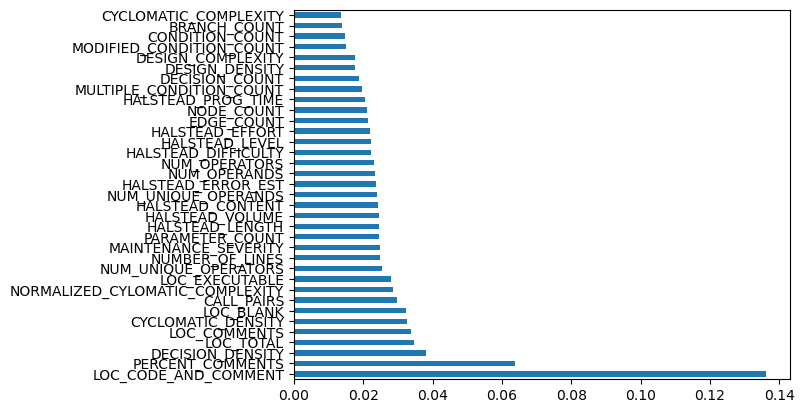

[0.03571613 0.01463922 0.02597906 0.12830657 0.03781771 0.01779733
 0.01325461 0.03597819 0.01464489 0.03859832 0.01626061 0.01798676
 0.02161277 0.01137933 0.00242113 0.02954344 0.0233534  0.02456029
 0.02334331 0.02189723 0.0221882  0.02294891 0.02003846 0.0207099
 0.02233698 0.02523187 0.01971633 0.01725936 0.02208648 0.02676955
 0.02266967 0.02578475 0.023063   0.02600417 0.02549328 0.06927163
 0.03333713]


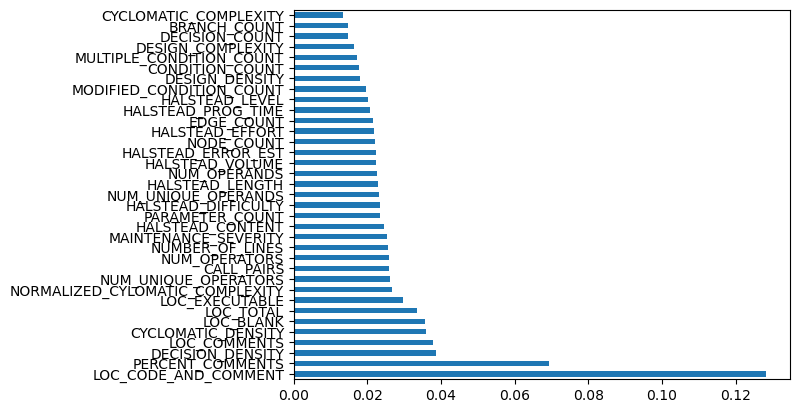

[0.03156805 0.0133749  0.02662433 0.13395432 0.03611565 0.01854122
 0.01202383 0.03256009 0.01944343 0.0390471  0.01582693 0.01513171
 0.023082   0.01078787 0.00339645 0.02688148 0.02249412 0.02521181
 0.02182394 0.0221586  0.02173005 0.02344033 0.02107956 0.02187072
 0.02324602 0.02413075 0.01679581 0.01795194 0.02152412 0.02668504
 0.02837937 0.02461216 0.02330124 0.02862285 0.02711501 0.06600233
 0.03346487]


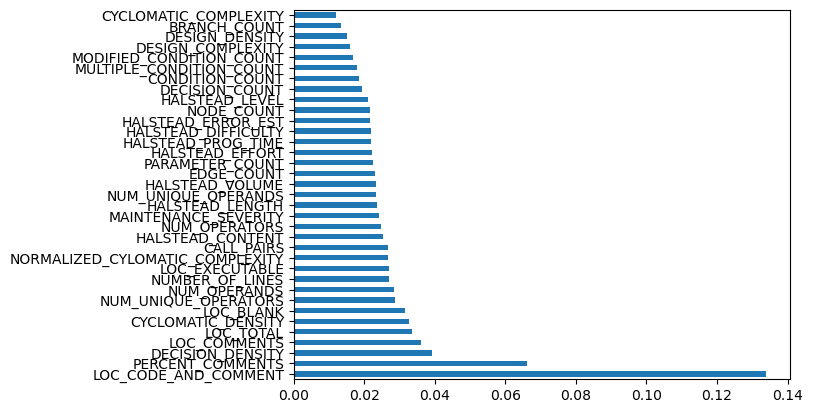

[0.0341604  0.0131689  0.02910824 0.1334198  0.03413892 0.01821435
 0.01307208 0.03513024 0.01804149 0.04007761 0.01716339 0.0167517
 0.0205562  0.01006044 0.00322683 0.02780499 0.02426074 0.02410105
 0.02214421 0.02397143 0.02308401 0.0241239  0.02235581 0.02369558
 0.02379526 0.02412371 0.01845326 0.01871459 0.02142034 0.0268208
 0.02424428 0.02321122 0.02401502 0.02423127 0.02335241 0.06232634
 0.03345921]


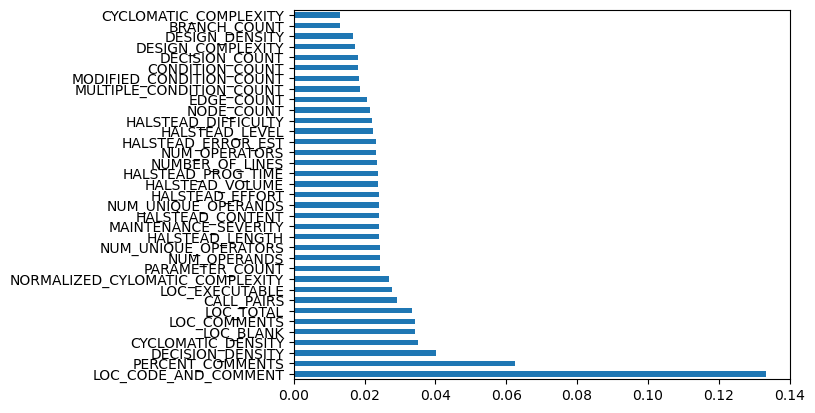

[0.03631463 0.01329731 0.02835868 0.13506809 0.03617665 0.01947606
 0.01292044 0.03800999 0.01959239 0.03525089 0.01713376 0.01784982
 0.02091266 0.00967047 0.00285103 0.02939367 0.02348047 0.02497936
 0.02207722 0.02191346 0.022447   0.02434568 0.02199249 0.02225497
 0.02308069 0.02486369 0.01461328 0.01604889 0.0199288  0.02924357
 0.02377175 0.02271094 0.02373662 0.02450164 0.02604062 0.05978473
 0.03590759]


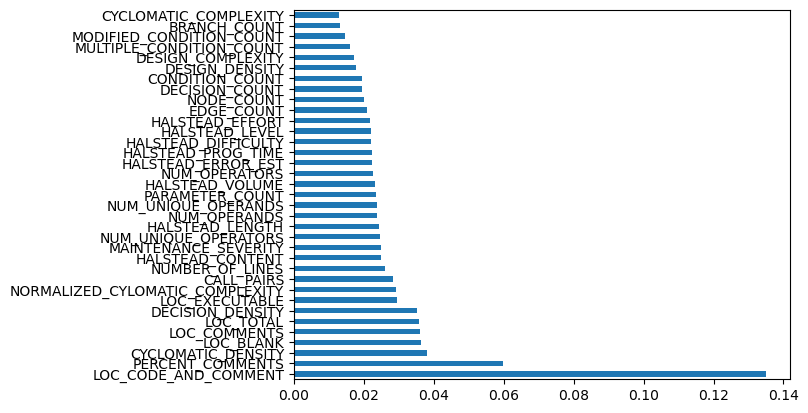

[0.03111672 0.01354328 0.02736839 0.13754758 0.03666481 0.01857012
 0.01392712 0.03246776 0.01616746 0.03759683 0.01671586 0.0172361
 0.02159468 0.01159098 0.00329938 0.02979801 0.02388513 0.02367371
 0.02211187 0.02057502 0.02345208 0.02283488 0.02338568 0.02055885
 0.02295535 0.02447523 0.01845199 0.02020298 0.02137377 0.02968443
 0.02421548 0.023749   0.02411351 0.02449406 0.02556879 0.05913253
 0.03590058]


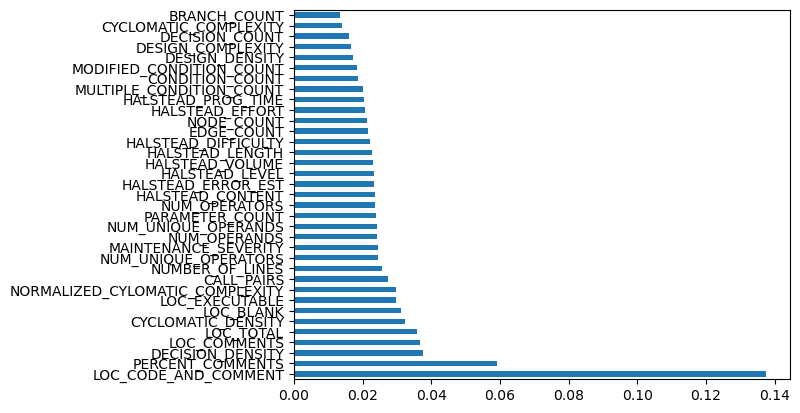

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
for dataset in dataSets:
    # print(dataset)
    X = orig_df.drop('defects', axis=1)  
    y = orig_df['defects']
    model.fit(X,y)
    print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(35).plot(kind='barh')
    plt.show()


Top  25  selected features: {list(selected_features)}


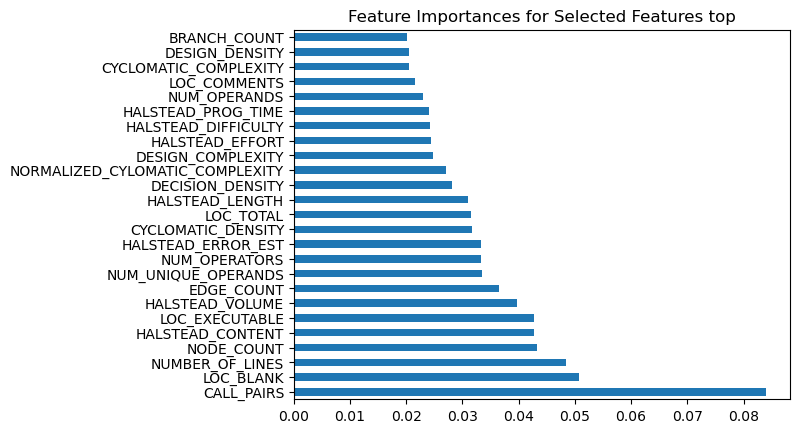

Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Top  25  selected features: {list(selected_features)}


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


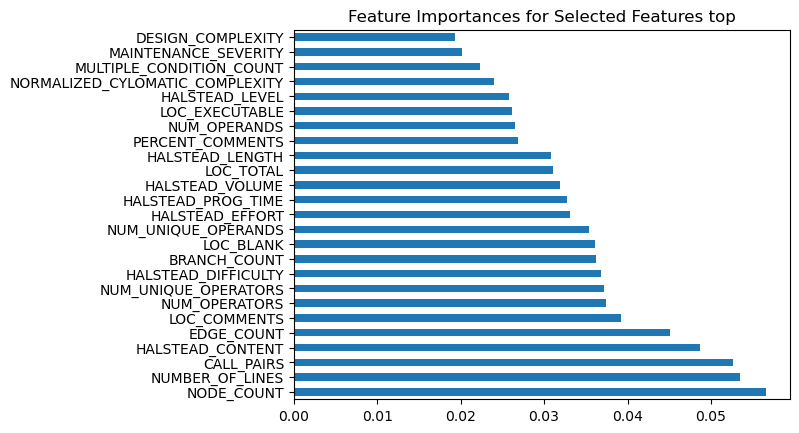

Accuracy: 0.89
Precision: 0.79
Recall: 0.89
F1 score: 0.84
------------------------------
Top  25  selected features: {list(selected_features)}


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


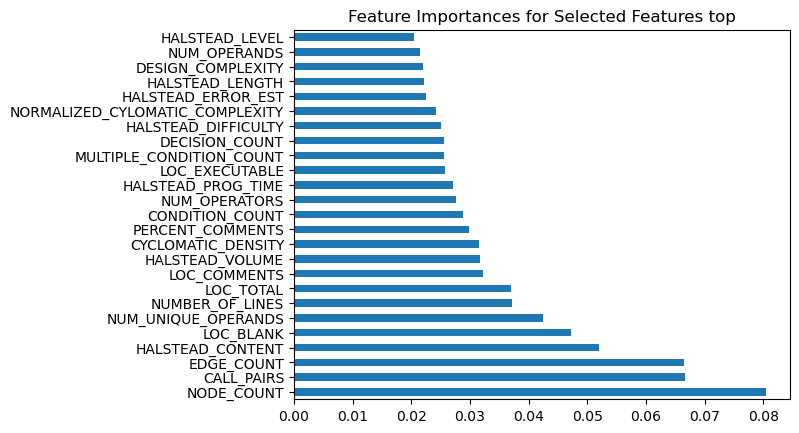

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.94
Precision: 0.88
Recall: 0.94
F1 score: 0.91
------------------------------
Top  25  selected features: {list(selected_features)}


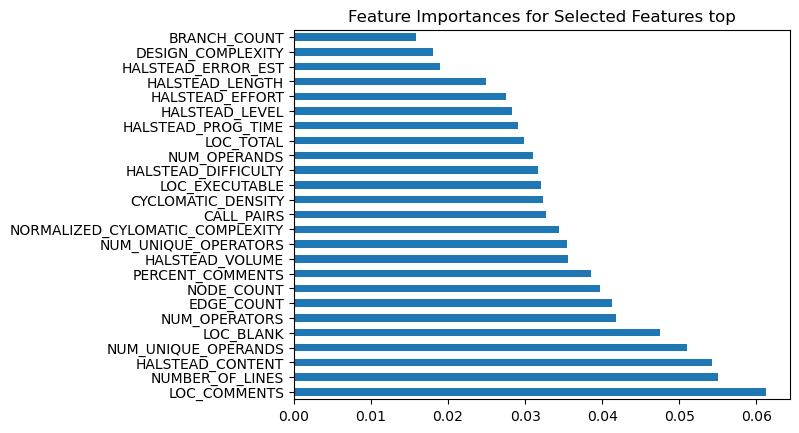

Accuracy: 0.87
Precision: 0.76
Recall: 0.87
F1 score: 0.81
------------------------------
Fold 5, RBF Kernel with gamma=0.01 and C=0.1:
Mean Accuracy: 0.89 ± 0.03
Mean Precision: 0.80 ± 0.05
Mean Recall: 0.89 ± 0.03
Mean F1 Score: 0.84 ± 0.04


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Top  25  selected features: {list(selected_features)}


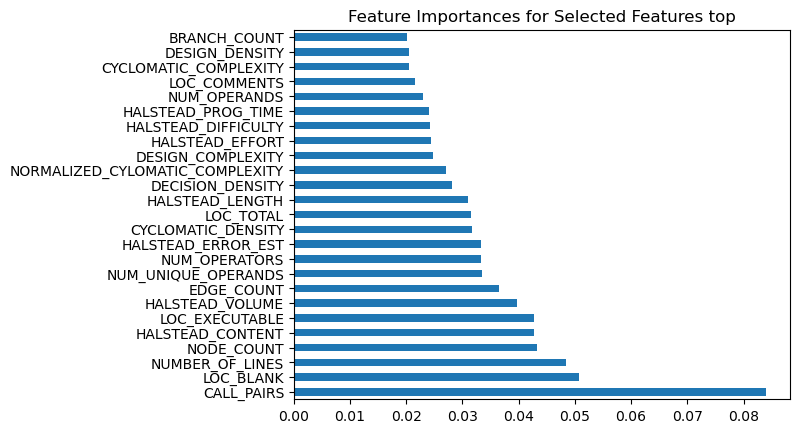

Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Top  25  selected features: {list(selected_features)}


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


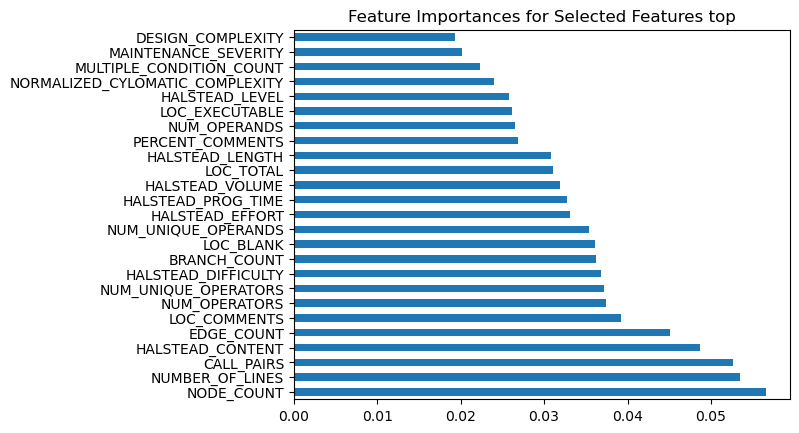

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.89
Precision: 0.79
Recall: 0.89
F1 score: 0.84
------------------------------
Top  25  selected features: {list(selected_features)}


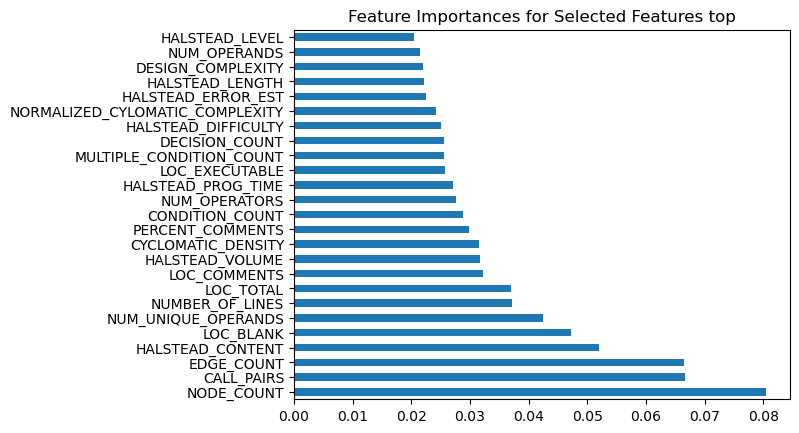

Accuracy: 0.94
Precision: 0.88
Recall: 0.94
F1 score: 0.91
------------------------------


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Top  25  selected features: {list(selected_features)}


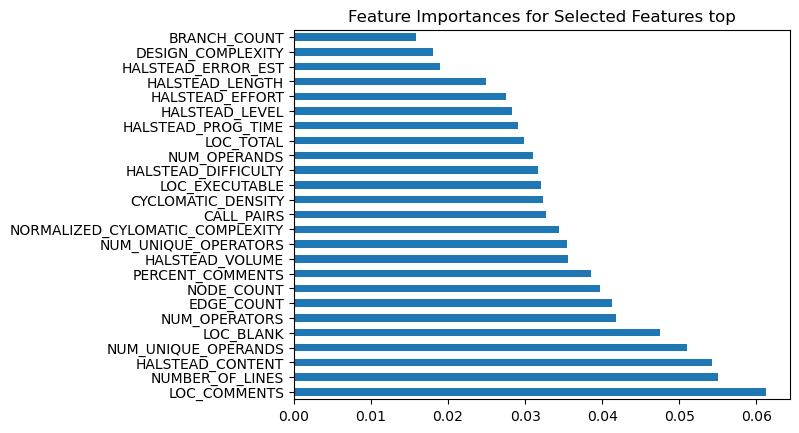

Accuracy: 0.87
Precision: 0.76
Recall: 0.87
F1 score: 0.81
------------------------------
Fold 5, RBF Kernel with gamma=0.1 and C=1:
Mean Accuracy: 0.89 ± 0.03
Mean Precision: 0.80 ± 0.05
Mean Recall: 0.89 ± 0.03
Mean F1 Score: 0.84 ± 0.04
Top  25  selected features: {list(selected_features)}


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


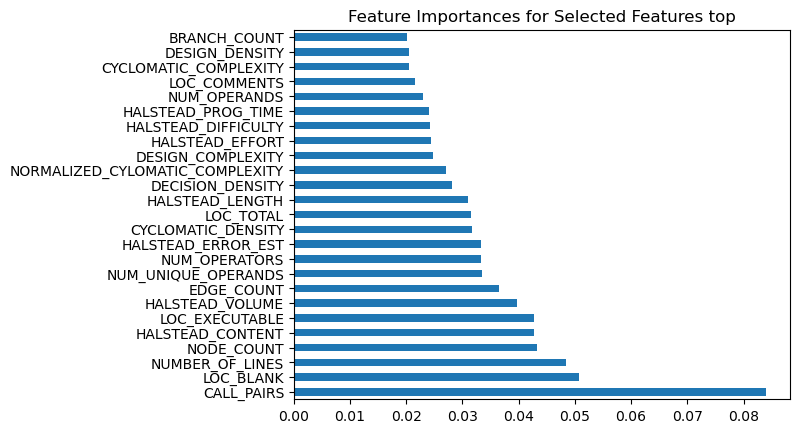

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Top  25  selected features: {list(selected_features)}


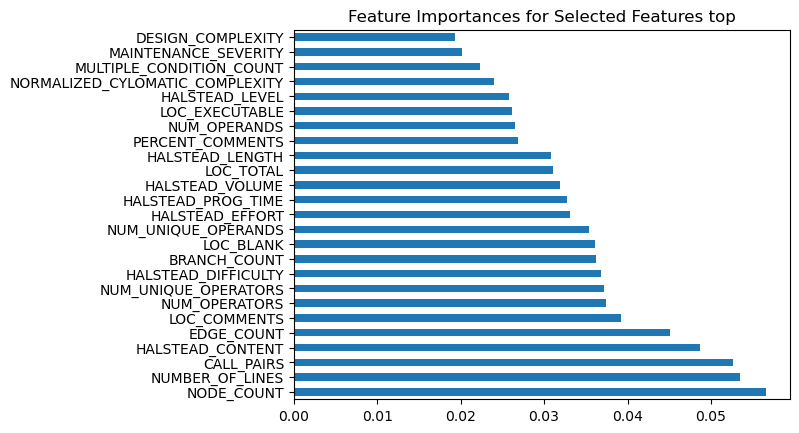

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.89
Precision: 0.79
Recall: 0.89
F1 score: 0.84
------------------------------
Top  25  selected features: {list(selected_features)}


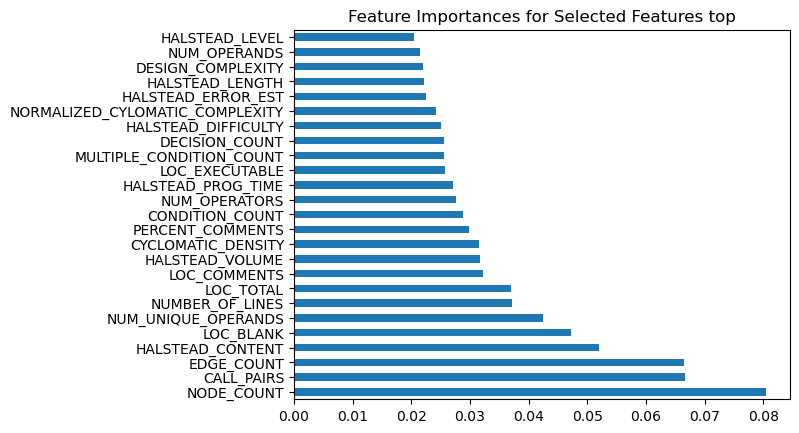

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.94
Precision: 0.88
Recall: 0.94
F1 score: 0.91
------------------------------
Top  25  selected features: {list(selected_features)}


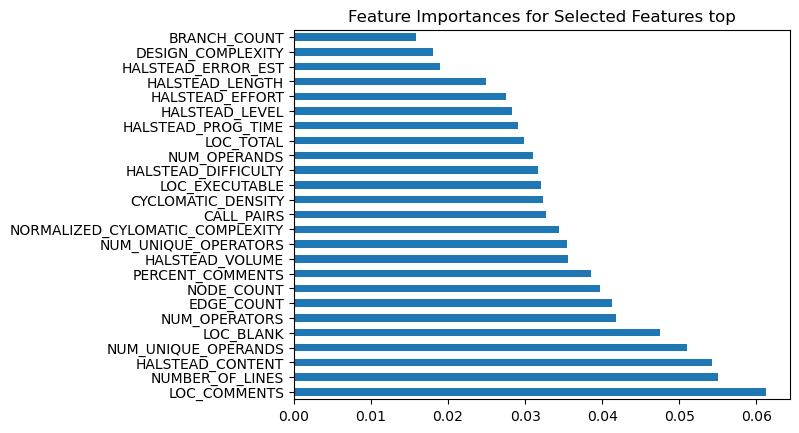

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.87
Precision: 0.76
Recall: 0.87
F1 score: 0.81
------------------------------
Fold 5, RBF Kernel with gamma=1 and C=10:
Mean Accuracy: 0.89 ± 0.03
Mean Precision: 0.80 ± 0.05
Mean Recall: 0.89 ± 0.03
Mean F1 Score: 0.84 ± 0.04
Top  25  selected features: {list(selected_features)}


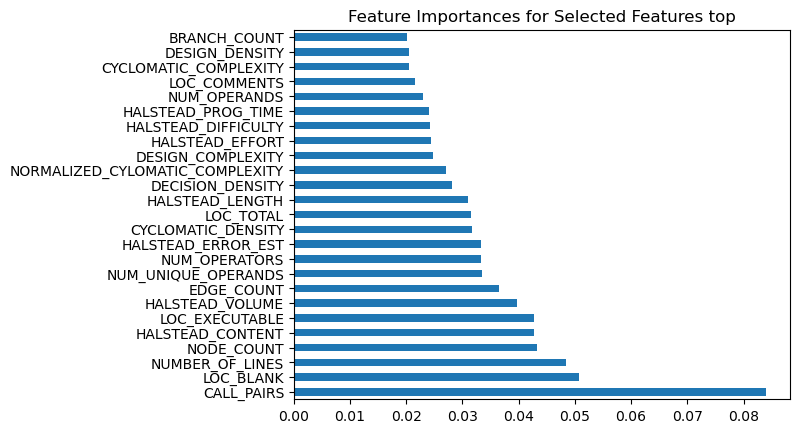

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Top  25  selected features: {list(selected_features)}


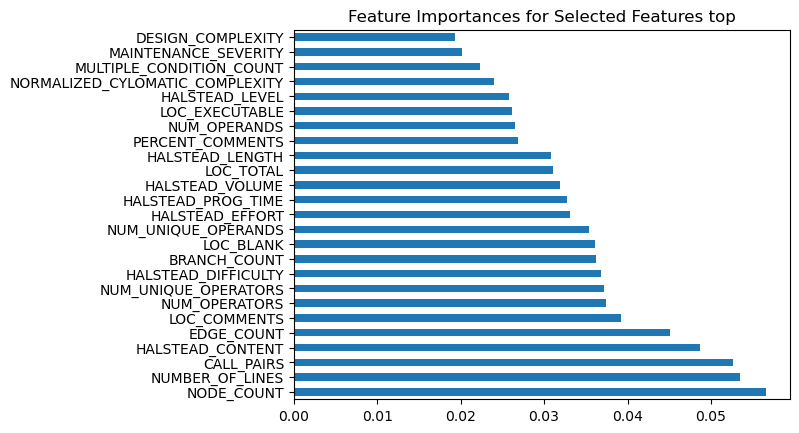

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.89
Precision: 0.79
Recall: 0.89
F1 score: 0.84
------------------------------
Top  25  selected features: {list(selected_features)}


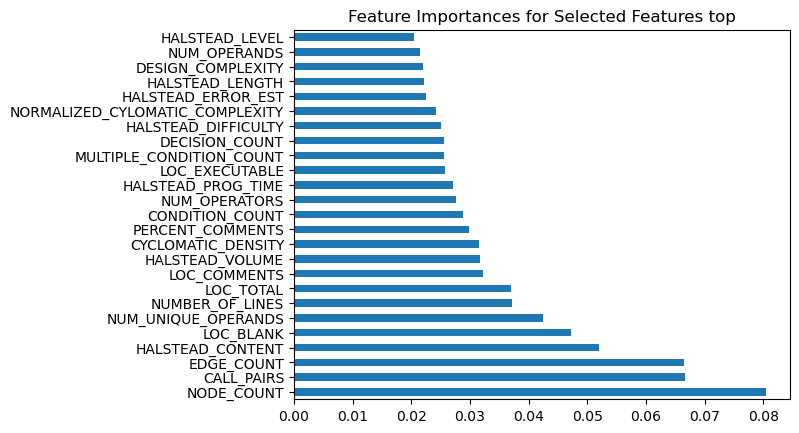

Accuracy: 0.94
Precision: 0.88
Recall: 0.94
F1 score: 0.91
------------------------------
Top  25  selected features: {list(selected_features)}


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


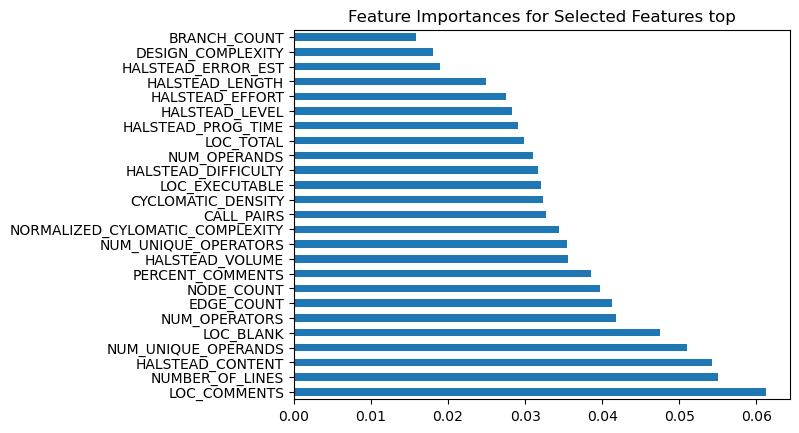

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.87
Precision: 0.76
Recall: 0.87
F1 score: 0.81
------------------------------
Fold 5, RBF Kernel with gamma=10 and C=100:
Mean Accuracy: 0.89 ± 0.03
Mean Precision: 0.80 ± 0.05
Mean Recall: 0.89 ± 0.03
Mean F1 Score: 0.84 ± 0.04
Top  25  selected features: {list(selected_features)}


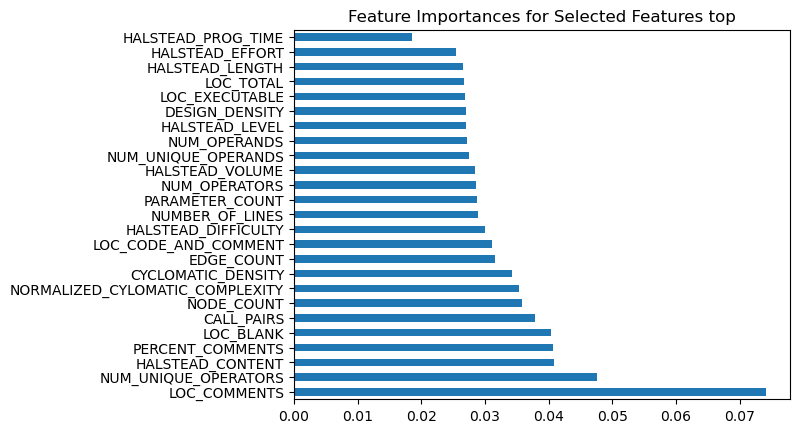

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.87
Precision: 0.75
Recall: 0.87
F1 score: 0.80
------------------------------
Top  25  selected features: {list(selected_features)}


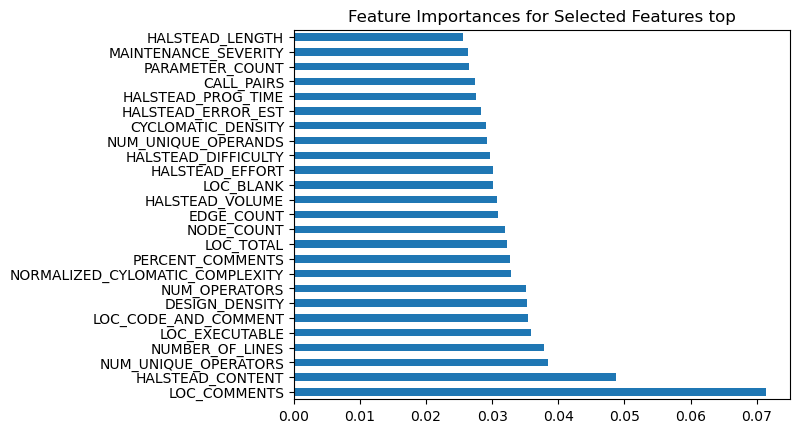

Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Top  25  selected features: {list(selected_features)}


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


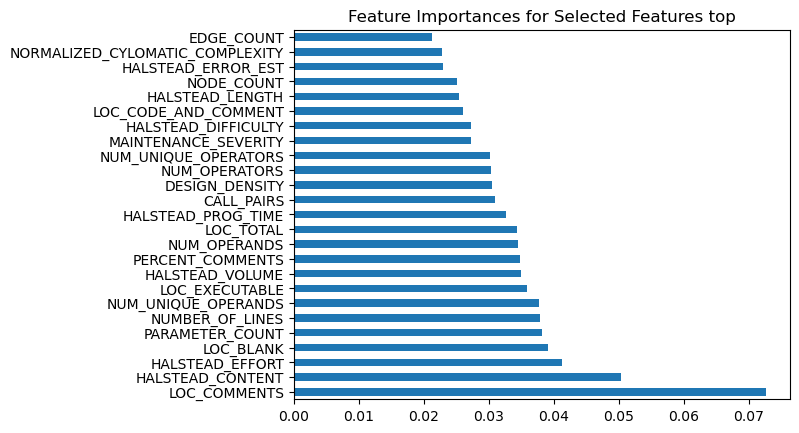

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.85
Precision: 0.73
Recall: 0.85
F1 score: 0.79
------------------------------
Top  25  selected features: {list(selected_features)}


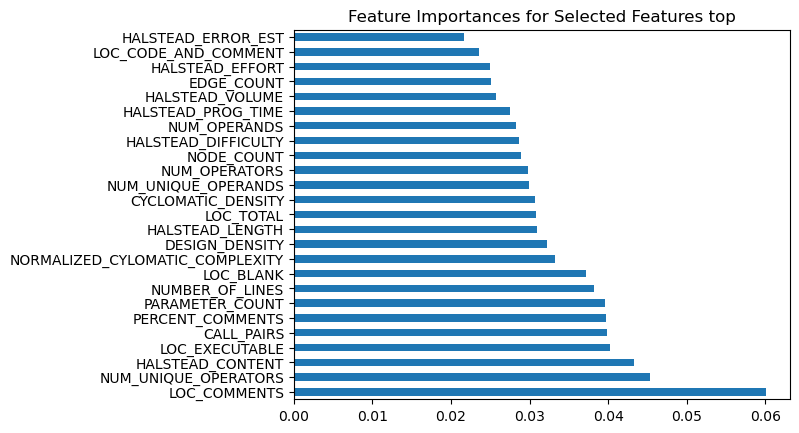

Accuracy: 0.89
Precision: 0.79
Recall: 0.89
F1 score: 0.84
------------------------------
Fold 5, RBF Kernel with gamma=0.01 and C=0.1:
Mean Accuracy: 0.89 ± 0.03
Mean Precision: 0.79 ± 0.05
Mean Recall: 0.89 ± 0.03
Mean F1 Score: 0.84 ± 0.04
Top  25  selected features: {list(selected_features)}


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


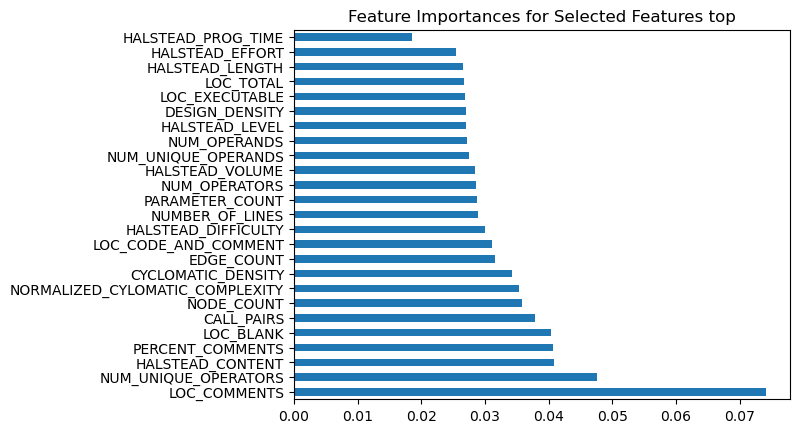

Accuracy: 0.87
Precision: 0.75
Recall: 0.87
F1 score: 0.80
------------------------------
Top  25  selected features: {list(selected_features)}


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


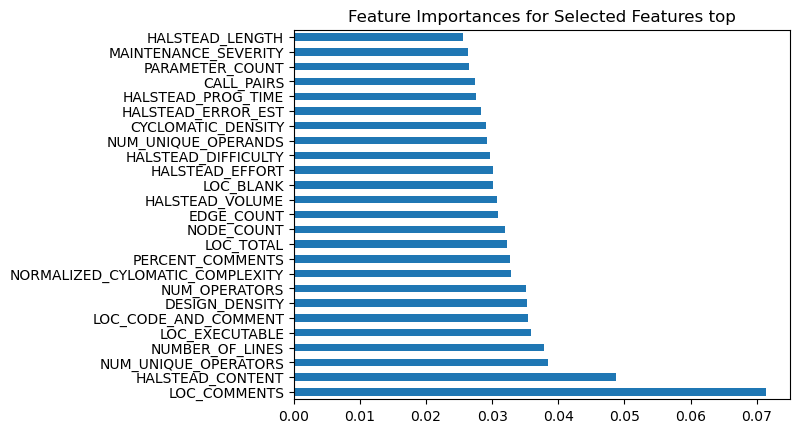

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Top  25  selected features: {list(selected_features)}


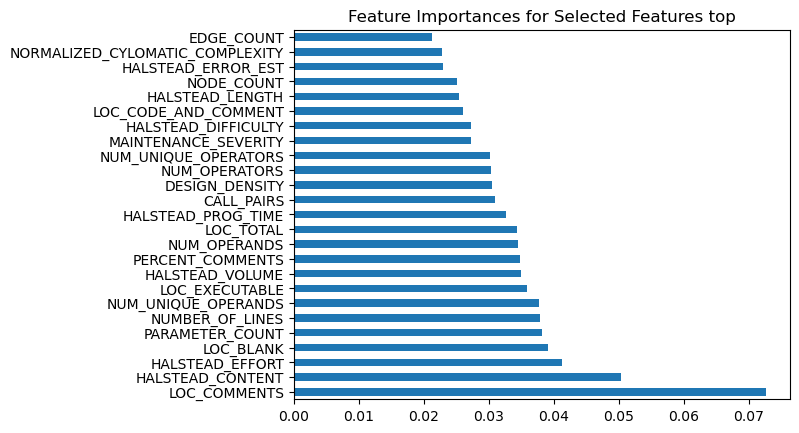

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.85
Precision: 0.73
Recall: 0.85
F1 score: 0.79
------------------------------
Top  25  selected features: {list(selected_features)}


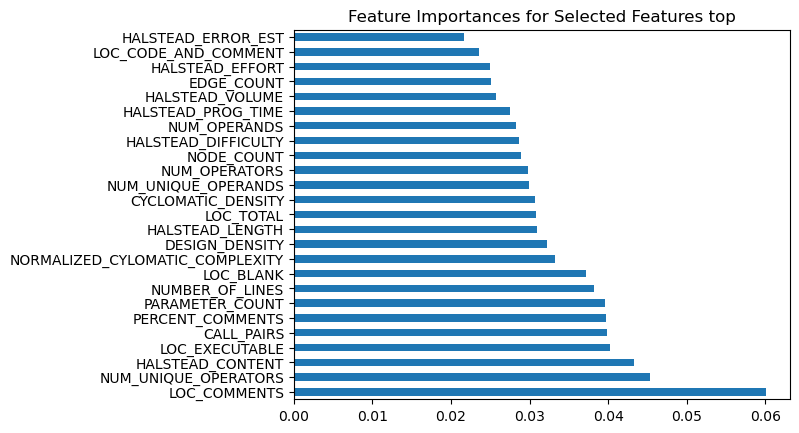

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.89
Precision: 0.79
Recall: 0.89
F1 score: 0.84
------------------------------
Fold 5, RBF Kernel with gamma=0.1 and C=1:
Mean Accuracy: 0.89 ± 0.02
Mean Precision: 0.79 ± 0.04
Mean Recall: 0.89 ± 0.02
Mean F1 Score: 0.83 ± 0.04
Top  25  selected features: {list(selected_features)}


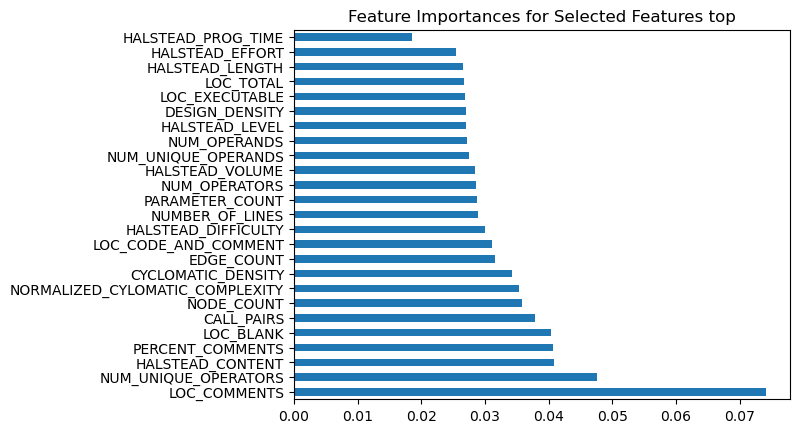

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.87
Precision: 0.75
Recall: 0.87
F1 score: 0.80
------------------------------
Top  25  selected features: {list(selected_features)}


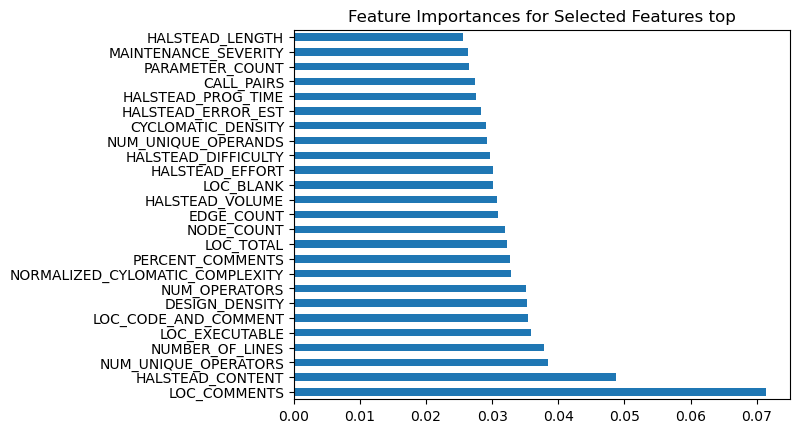

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Top  25  selected features: {list(selected_features)}


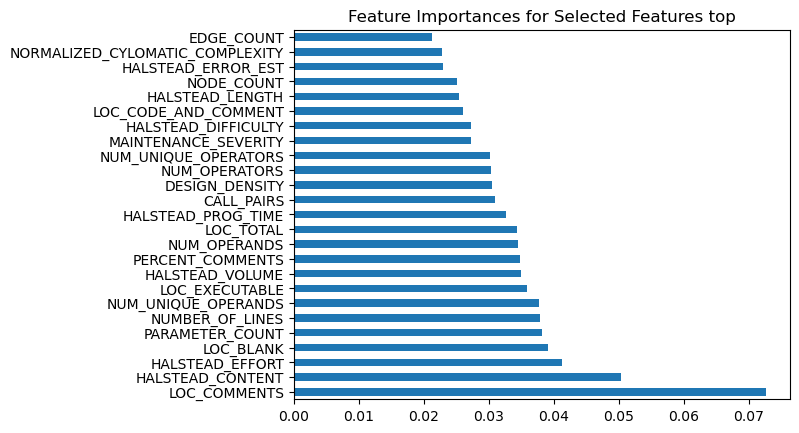

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.85
Precision: 0.73
Recall: 0.85
F1 score: 0.79
------------------------------
Top  25  selected features: {list(selected_features)}


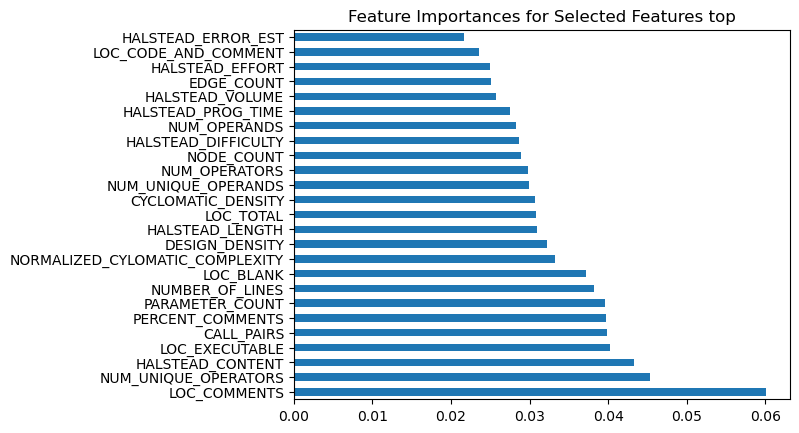

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.89
Precision: 0.79
Recall: 0.89
F1 score: 0.84
------------------------------
Fold 5, RBF Kernel with gamma=1 and C=10:
Mean Accuracy: 0.88 ± 0.02
Mean Precision: 0.78 ± 0.04
Mean Recall: 0.88 ± 0.02
Mean F1 Score: 0.83 ± 0.03
Top  25  selected features: {list(selected_features)}


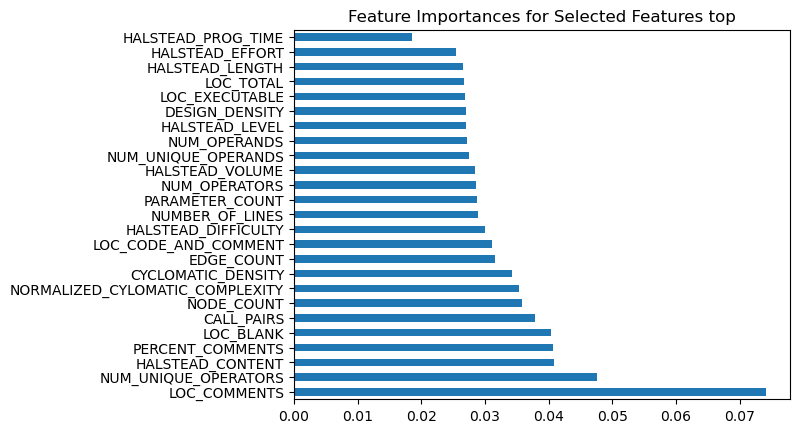

Accuracy: 0.87
Precision: 0.75
Recall: 0.87
F1 score: 0.80
------------------------------
Top  25  selected features: {list(selected_features)}


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


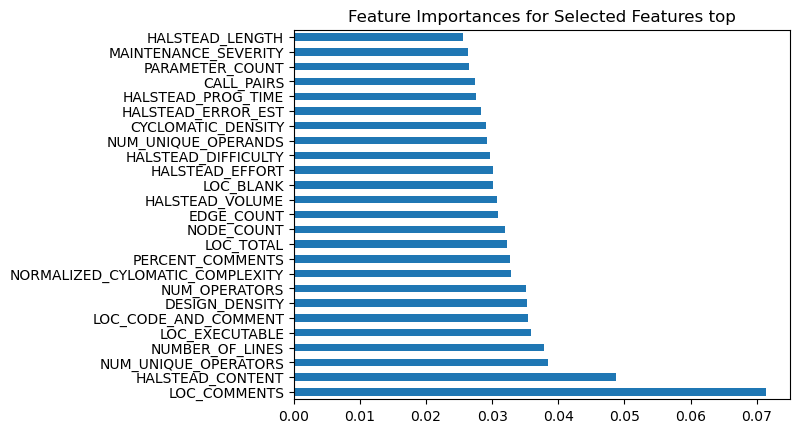

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Top  25  selected features: {list(selected_features)}


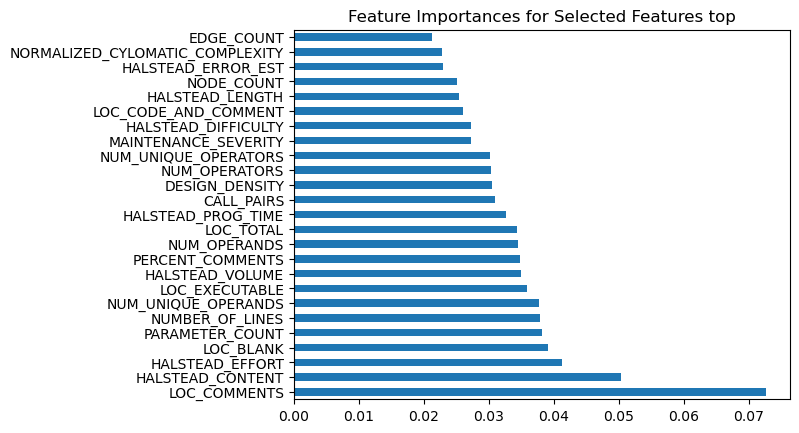

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.85
Precision: 0.73
Recall: 0.85
F1 score: 0.79
------------------------------
Top  25  selected features: {list(selected_features)}


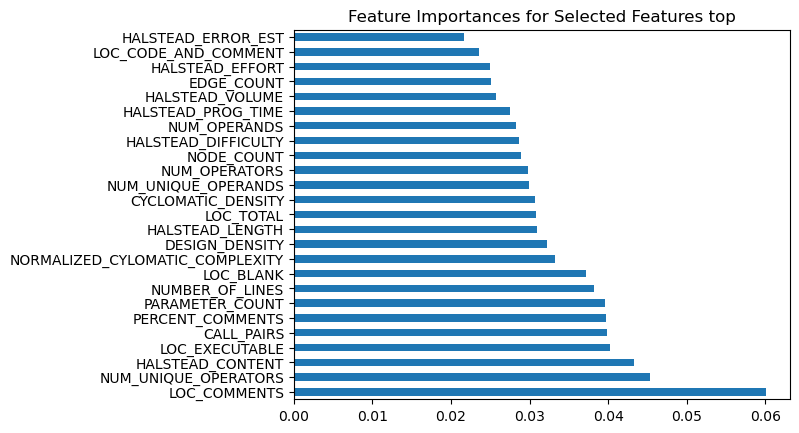

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.89
Precision: 0.79
Recall: 0.89
F1 score: 0.84
------------------------------
Fold 5, RBF Kernel with gamma=10 and C=100:
Mean Accuracy: 0.88 ± 0.02
Mean Precision: 0.78 ± 0.04
Mean Recall: 0.88 ± 0.02
Mean F1 Score: 0.83 ± 0.03
Top  14  selected features: {list(selected_features)}


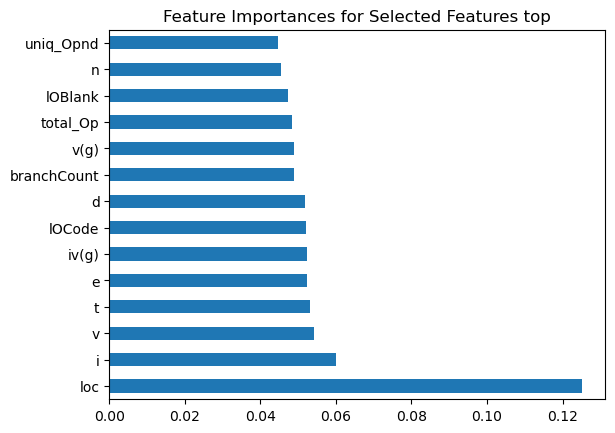

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.83
Precision: 0.68
Recall: 0.83
F1 score: 0.75
------------------------------
Top  14  selected features: {list(selected_features)}


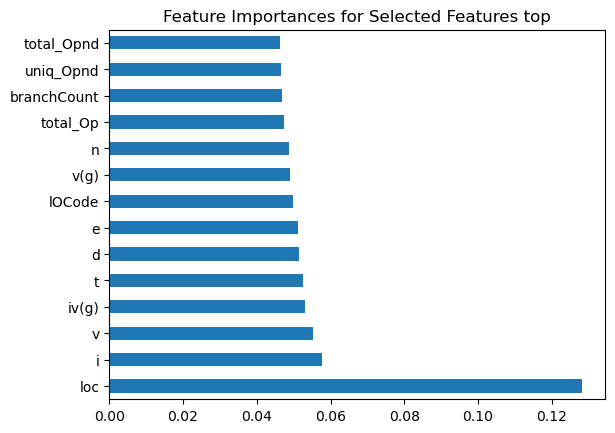

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.85
Precision: 0.72
Recall: 0.85
F1 score: 0.78
------------------------------
Top  14  selected features: {list(selected_features)}


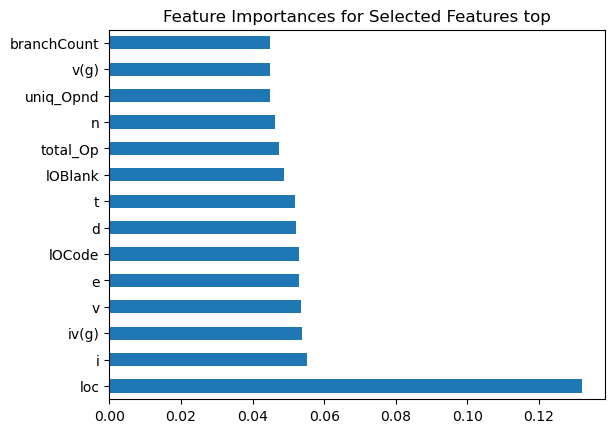

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.85
Precision: 0.72
Recall: 0.85
F1 score: 0.78
------------------------------
Top  14  selected features: {list(selected_features)}


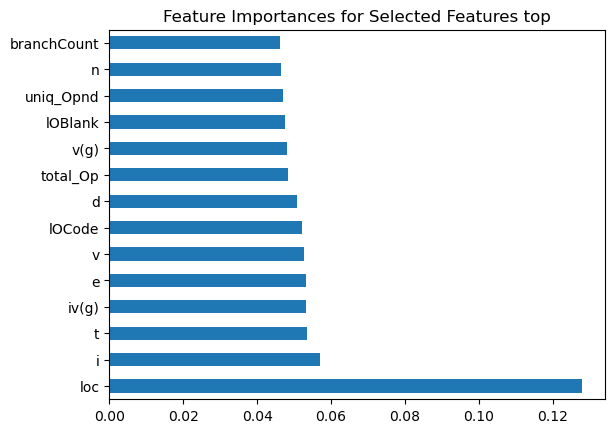

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.84
Precision: 0.70
Recall: 0.84
F1 score: 0.76
------------------------------
Fold 5, RBF Kernel with gamma=0.01 and C=0.1:
Mean Accuracy: 0.88 ± 0.03
Mean Precision: 0.77 ± 0.05
Mean Recall: 0.88 ± 0.03
Mean F1 Score: 0.82 ± 0.04
Top  14  selected features: {list(selected_features)}


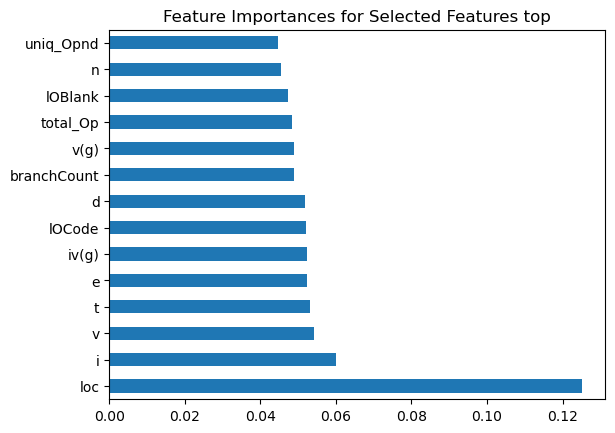

Accuracy: 0.83
Precision: 0.81
Recall: 0.83
F1 score: 0.77
------------------------------
Top  14  selected features: {list(selected_features)}


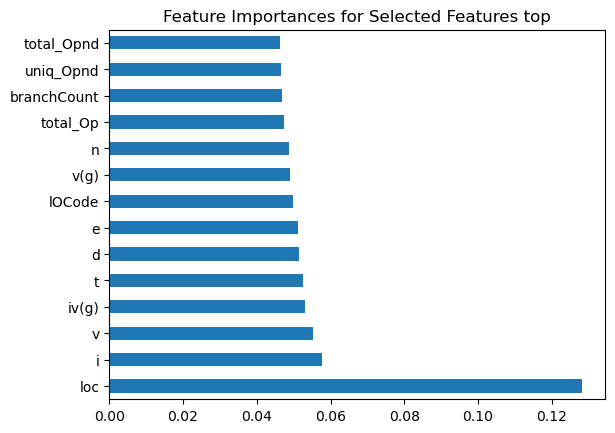

Accuracy: 0.85
Precision: 0.84
Recall: 0.85
F1 score: 0.80
------------------------------
Top  14  selected features: {list(selected_features)}


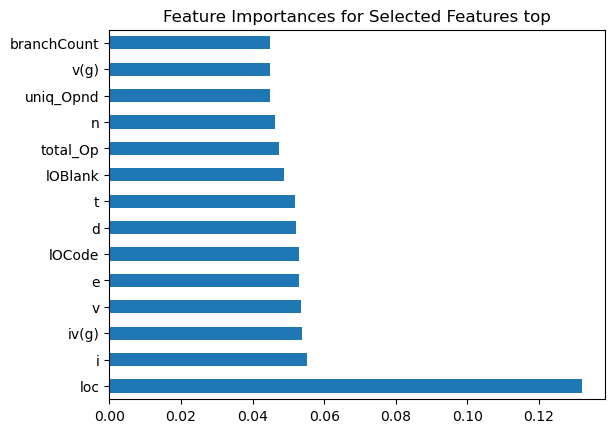

Accuracy: 0.85
Precision: 0.82
Recall: 0.85
F1 score: 0.79
------------------------------
Top  14  selected features: {list(selected_features)}


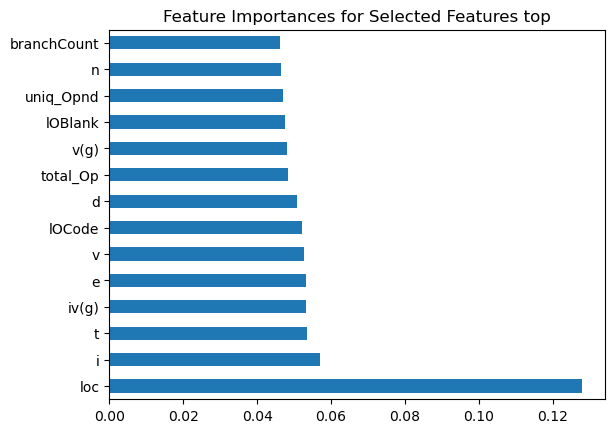

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 score: 0.78
------------------------------
Fold 5, RBF Kernel with gamma=0.1 and C=1:
Mean Accuracy: 0.87 ± 0.03
Mean Precision: 0.78 ± 0.05
Mean Recall: 0.87 ± 0.03
Mean F1 Score: 0.82 ± 0.04
Top  14  selected features: {list(selected_features)}


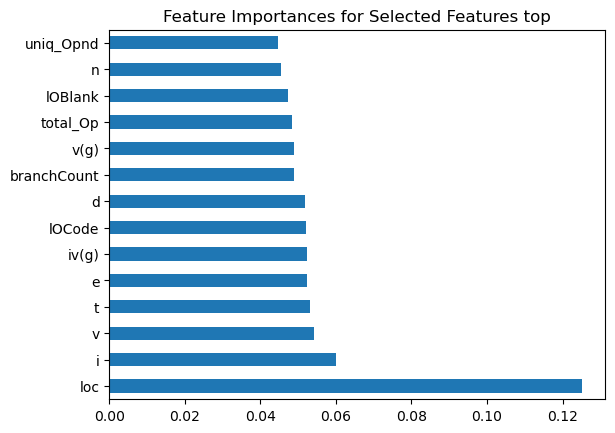

Accuracy: 0.83
Precision: 0.80
Recall: 0.83
F1 score: 0.76
------------------------------
Top  14  selected features: {list(selected_features)}


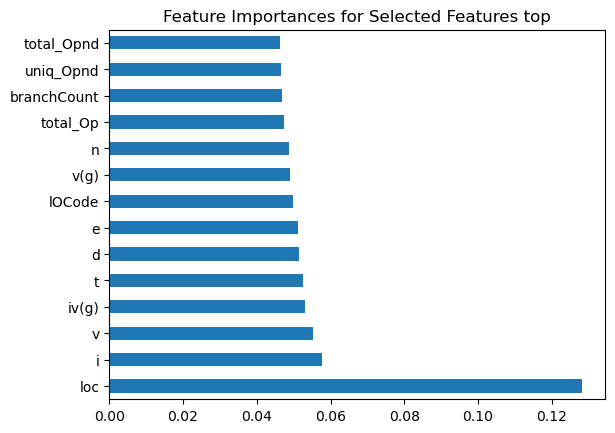

Accuracy: 0.85
Precision: 0.84
Recall: 0.85
F1 score: 0.80
------------------------------
Top  14  selected features: {list(selected_features)}


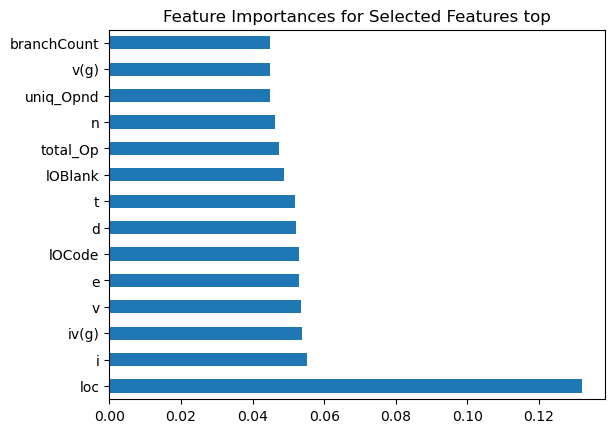

Accuracy: 0.85
Precision: 0.79
Recall: 0.85
F1 score: 0.79
------------------------------
Top  14  selected features: {list(selected_features)}


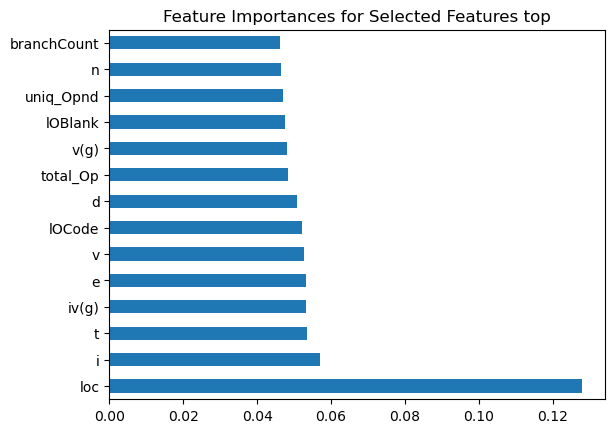

Accuracy: 0.84
Precision: 0.81
Recall: 0.84
F1 score: 0.78
------------------------------
Fold 5, RBF Kernel with gamma=1 and C=10:
Mean Accuracy: 0.87 ± 0.03
Mean Precision: 0.78 ± 0.05
Mean Recall: 0.87 ± 0.03
Mean F1 Score: 0.81 ± 0.04
Top  14  selected features: {list(selected_features)}


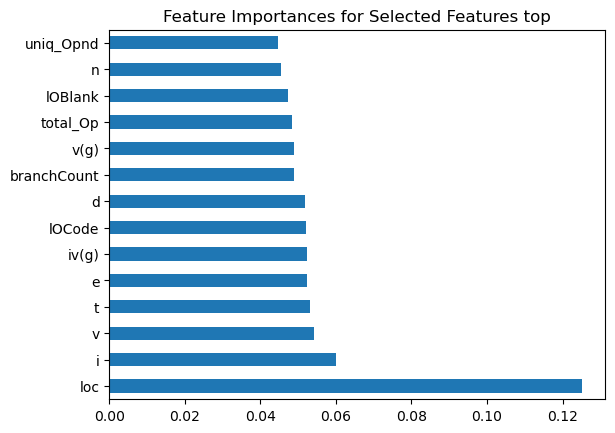

Accuracy: 0.83
Precision: 0.80
Recall: 0.83
F1 score: 0.76
------------------------------
Top  14  selected features: {list(selected_features)}


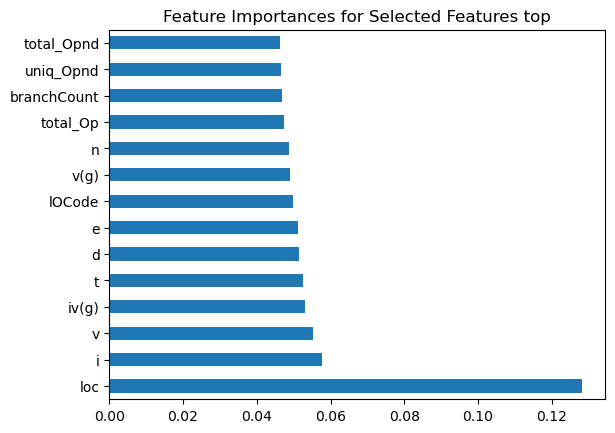

Accuracy: 0.85
Precision: 0.84
Recall: 0.85
F1 score: 0.79
------------------------------
Top  14  selected features: {list(selected_features)}


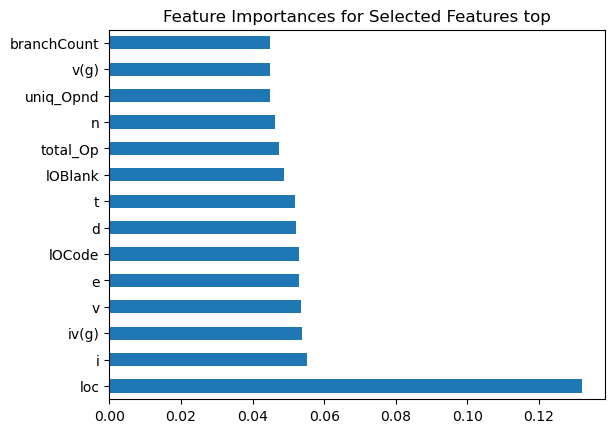

Accuracy: 0.85
Precision: 0.81
Recall: 0.85
F1 score: 0.79
------------------------------
Top  14  selected features: {list(selected_features)}


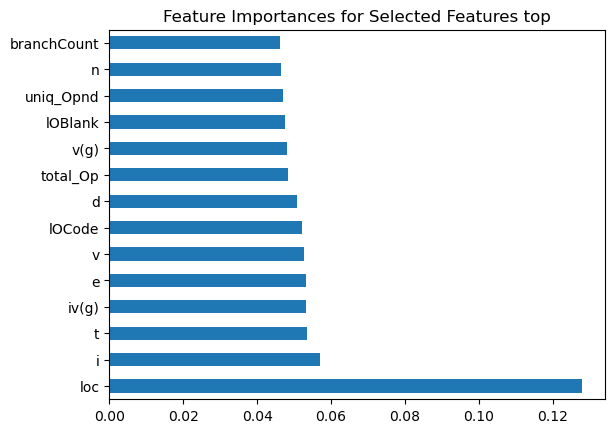

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 score: 0.78
------------------------------
Fold 5, RBF Kernel with gamma=10 and C=100:
Mean Accuracy: 0.87 ± 0.03
Mean Precision: 0.78 ± 0.05
Mean Recall: 0.87 ± 0.03
Mean F1 Score: 0.81 ± 0.04
Top  14  selected features: {list(selected_features)}


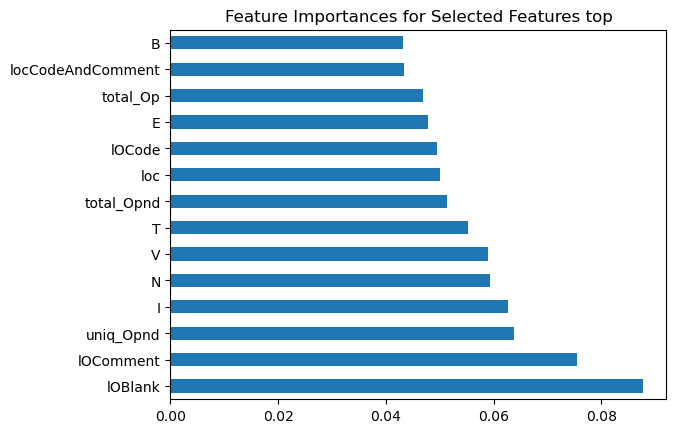

Accuracy: 0.93
Precision: 0.87
Recall: 0.93
F1 score: 0.90
------------------------------
Top  14  selected features: {list(selected_features)}


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


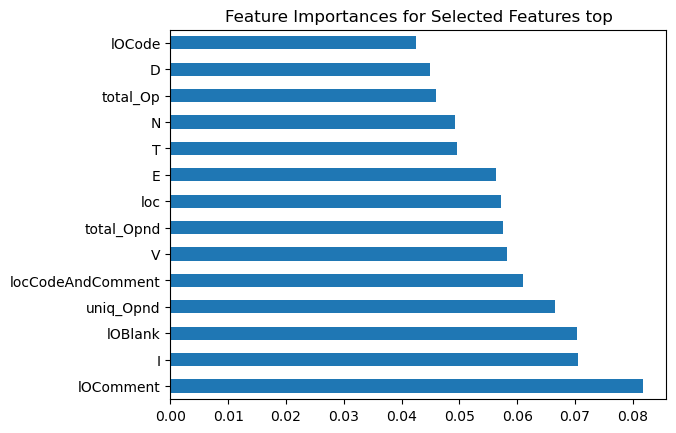

Accuracy: 0.95
Precision: 0.91
Recall: 0.95
F1 score: 0.93
------------------------------
Top  14  selected features: {list(selected_features)}


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


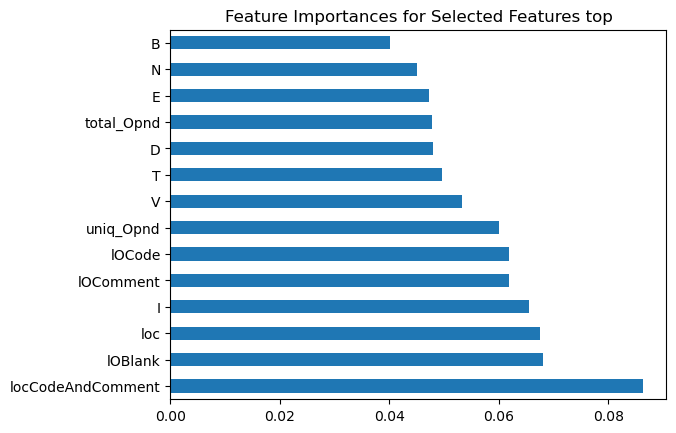

Accuracy: 0.92
Precision: 0.85
Recall: 0.92
F1 score: 0.88
------------------------------
Top  14  selected features: {list(selected_features)}


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


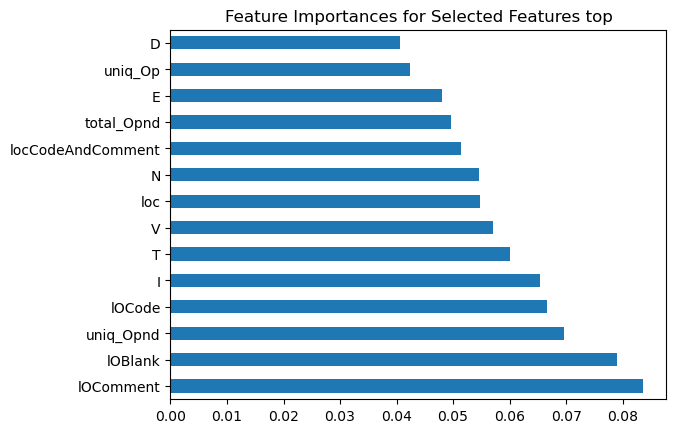

Accuracy: 0.92
Precision: 0.84
Recall: 0.92
F1 score: 0.88
------------------------------
Fold 5, RBF Kernel with gamma=0.01 and C=0.1:
Mean Accuracy: 0.87 ± 0.03
Mean Precision: 0.79 ± 0.05
Mean Recall: 0.87 ± 0.03
Mean F1 Score: 0.82 ± 0.04
Top  14  selected features: {list(selected_features)}


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


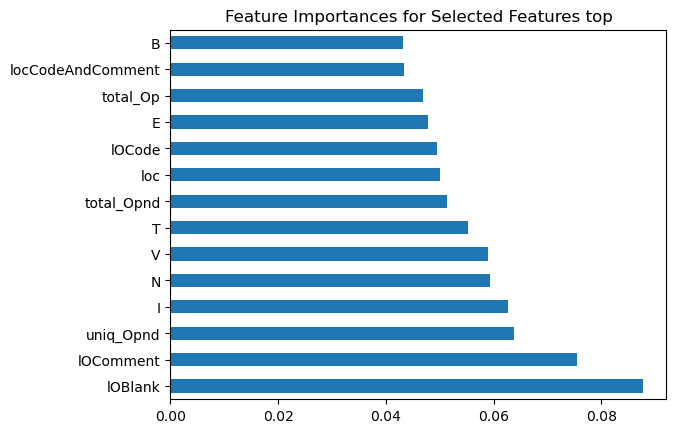

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 score: 0.91
------------------------------
Top  14  selected features: {list(selected_features)}


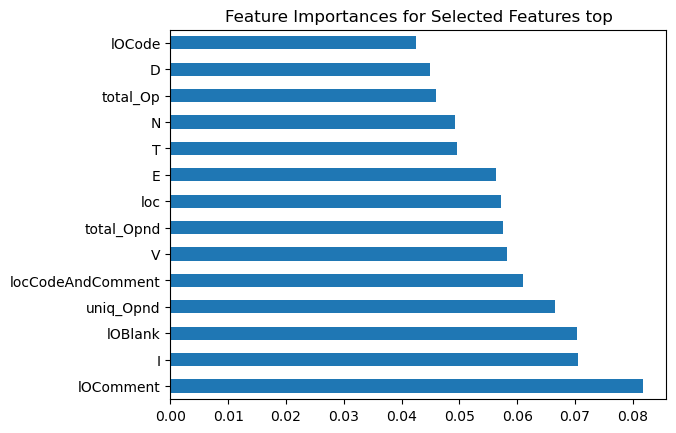

Accuracy: 0.96
Precision: 0.95
Recall: 0.96
F1 score: 0.94
------------------------------
Top  14  selected features: {list(selected_features)}


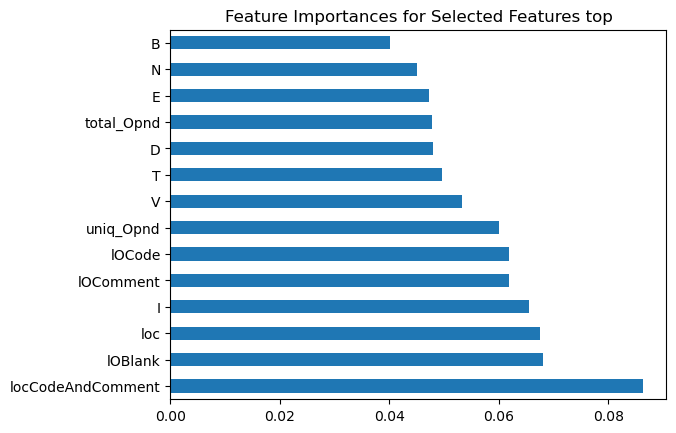

Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1 score: 0.92
------------------------------
Top  14  selected features: {list(selected_features)}


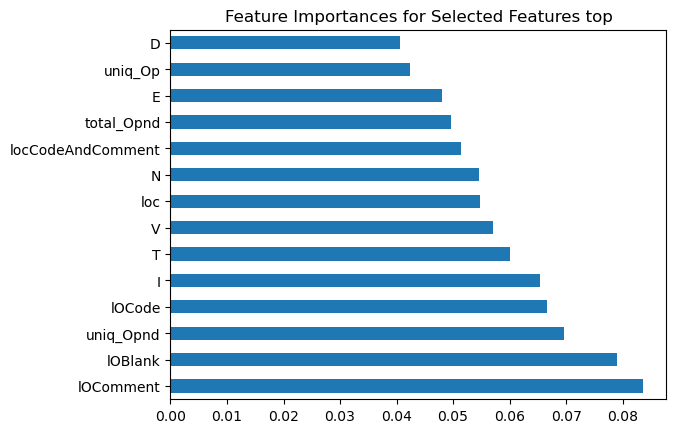

Accuracy: 0.92
Precision: 0.90
Recall: 0.92
F1 score: 0.89
------------------------------
Fold 5, RBF Kernel with gamma=0.1 and C=1:
Mean Accuracy: 0.88 ± 0.03
Mean Precision: 0.80 ± 0.06
Mean Recall: 0.88 ± 0.03
Mean F1 Score: 0.82 ± 0.05
Top  14  selected features: {list(selected_features)}


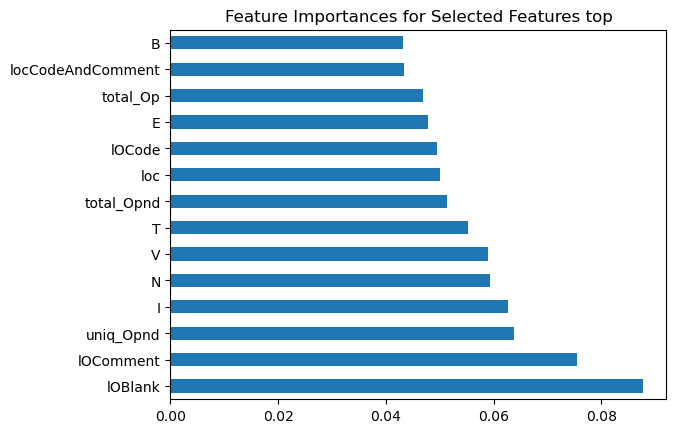

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 score: 0.91
------------------------------
Top  14  selected features: {list(selected_features)}


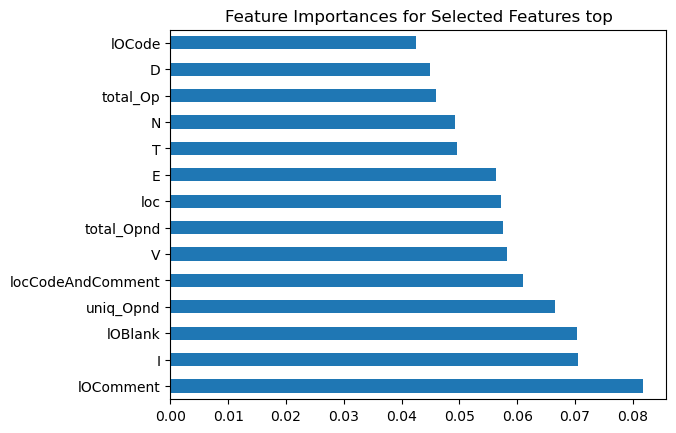

Accuracy: 0.95
Precision: 0.94
Recall: 0.95
F1 score: 0.94
------------------------------
Top  14  selected features: {list(selected_features)}


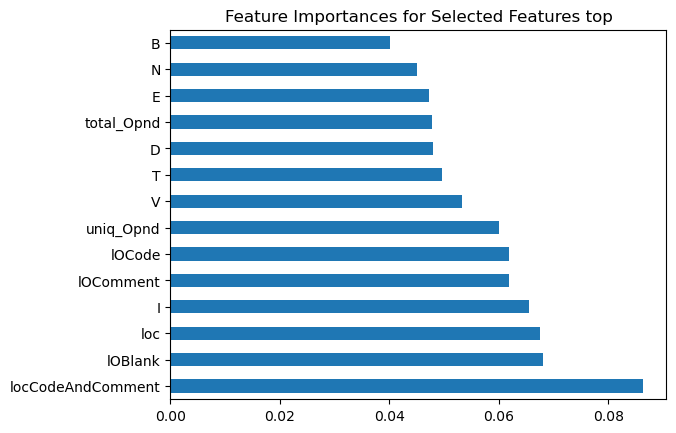

Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1 score: 0.92
------------------------------
Top  14  selected features: {list(selected_features)}


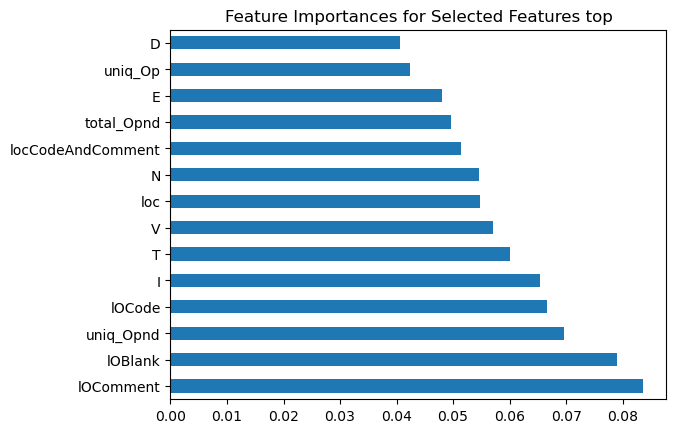

Accuracy: 0.92
Precision: 0.90
Recall: 0.92
F1 score: 0.89
------------------------------
Fold 5, RBF Kernel with gamma=1 and C=10:
Mean Accuracy: 0.88 ± 0.04
Mean Precision: 0.81 ± 0.07
Mean Recall: 0.88 ± 0.04
Mean F1 Score: 0.83 ± 0.05
Top  14  selected features: {list(selected_features)}


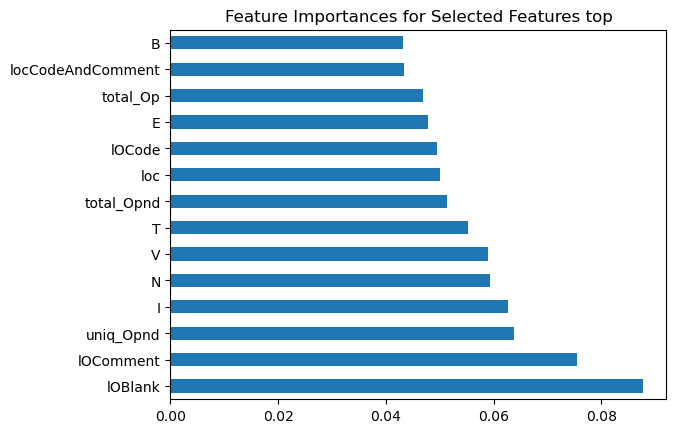

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 score: 0.91
------------------------------
Top  14  selected features: {list(selected_features)}


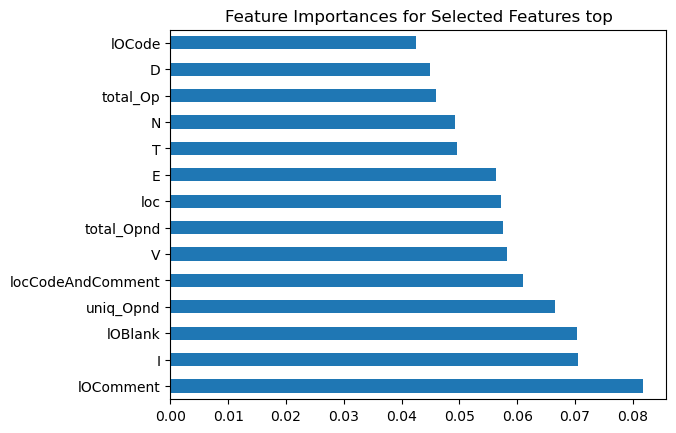

Accuracy: 0.95
Precision: 0.94
Recall: 0.95
F1 score: 0.94
------------------------------
Top  14  selected features: {list(selected_features)}


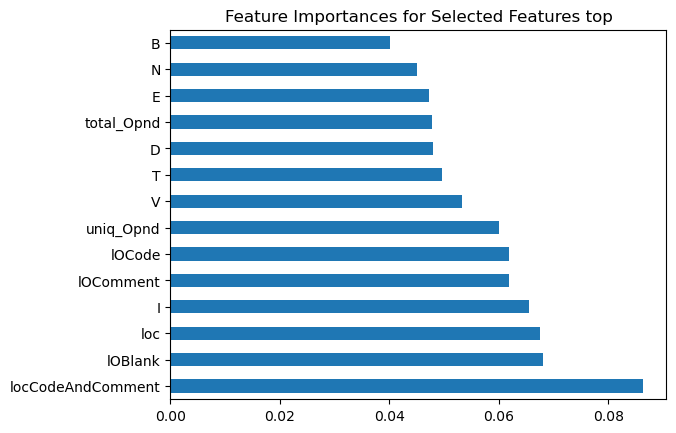

Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1 score: 0.92
------------------------------
Top  14  selected features: {list(selected_features)}


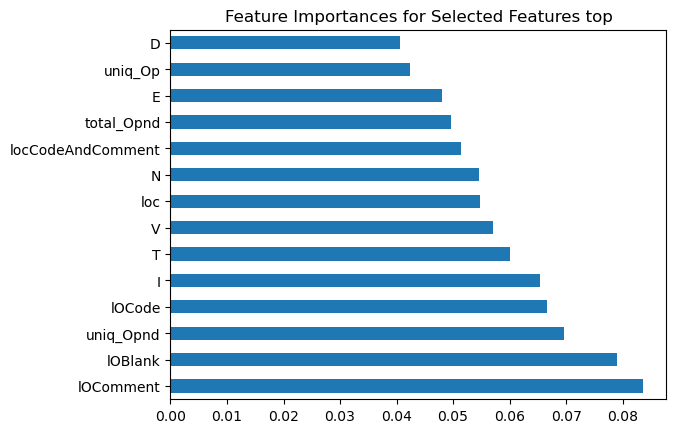

Accuracy: 0.92
Precision: 0.90
Recall: 0.92
F1 score: 0.89
------------------------------
Fold 5, RBF Kernel with gamma=10 and C=100:
Mean Accuracy: 0.89 ± 0.04
Mean Precision: 0.82 ± 0.07
Mean Recall: 0.89 ± 0.04
Mean F1 Score: 0.84 ± 0.05
Top  25  selected features: {list(selected_features)}


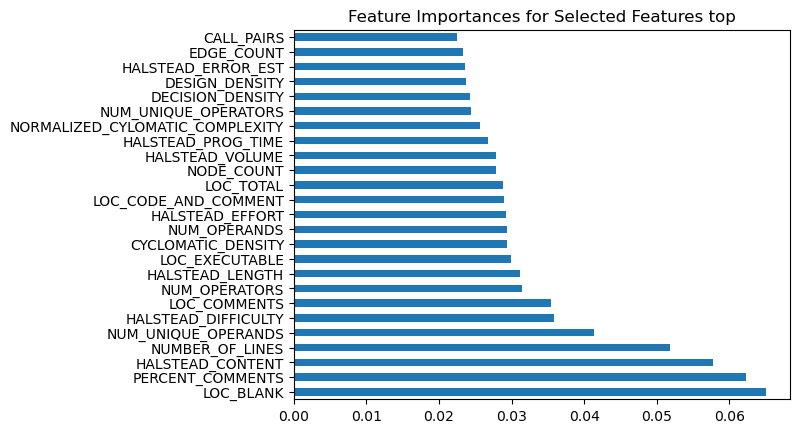

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.86
Precision: 0.74
Recall: 0.86
F1 score: 0.79
------------------------------
Top  25  selected features: {list(selected_features)}


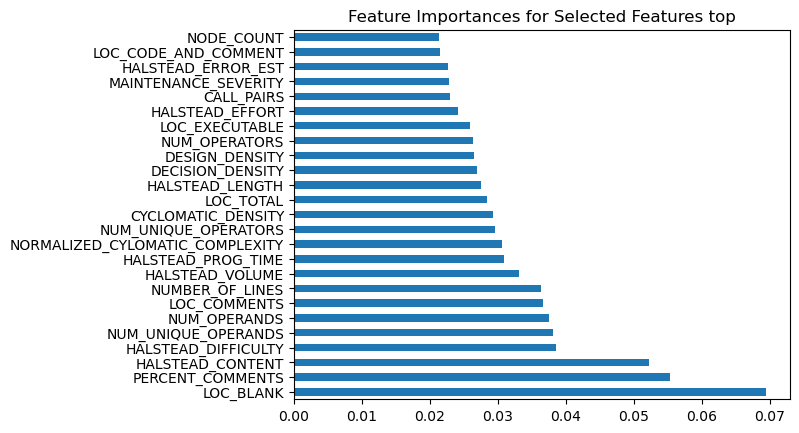

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Top  25  selected features: {list(selected_features)}


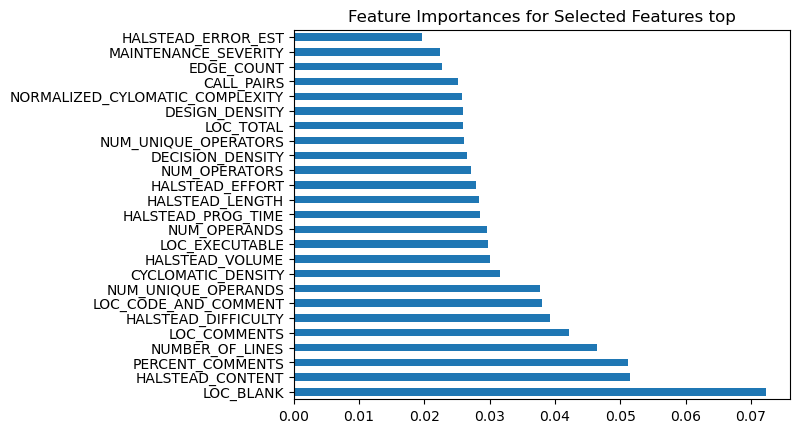

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.89
Precision: 0.79
Recall: 0.89
F1 score: 0.84
------------------------------
Top  25  selected features: {list(selected_features)}


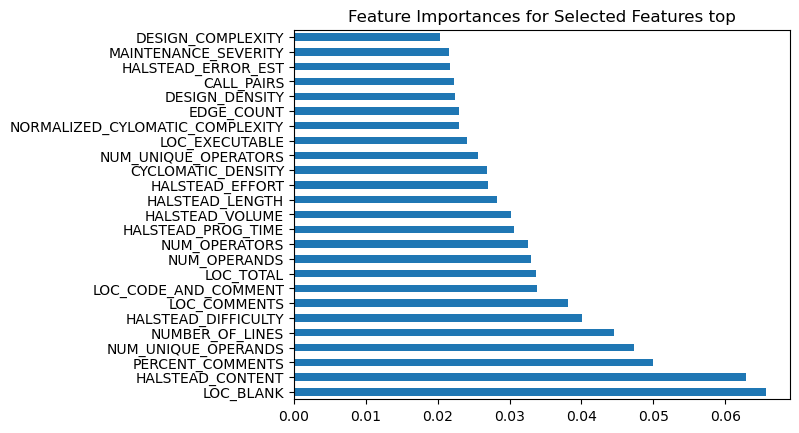

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Fold 5, RBF Kernel with gamma=0.01 and C=0.1:
Mean Accuracy: 0.89 ± 0.04
Mean Precision: 0.81 ± 0.07
Mean Recall: 0.89 ± 0.04
Mean F1 Score: 0.83 ± 0.05
Top  25  selected features: {list(selected_features)}


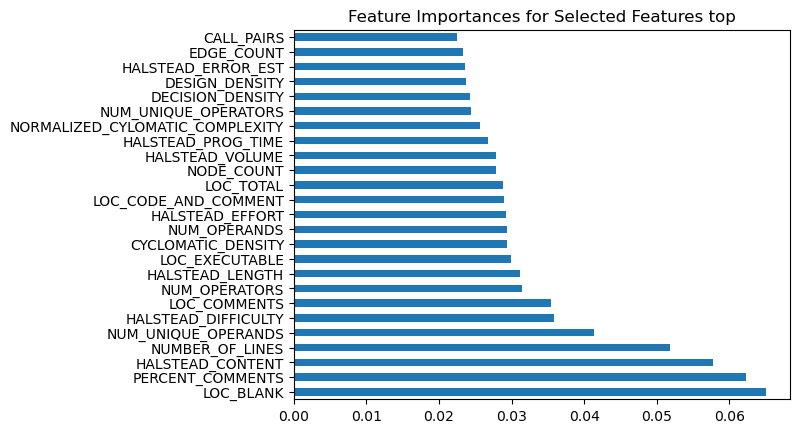

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.86
Precision: 0.74
Recall: 0.86
F1 score: 0.79
------------------------------
Top  25  selected features: {list(selected_features)}


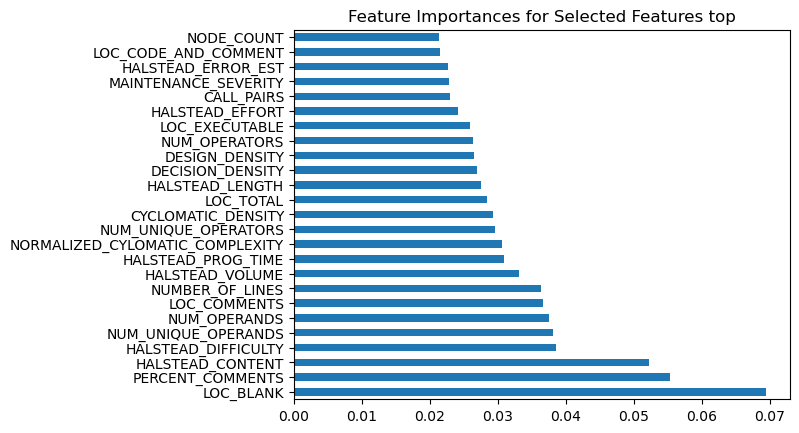

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Top  25  selected features: {list(selected_features)}


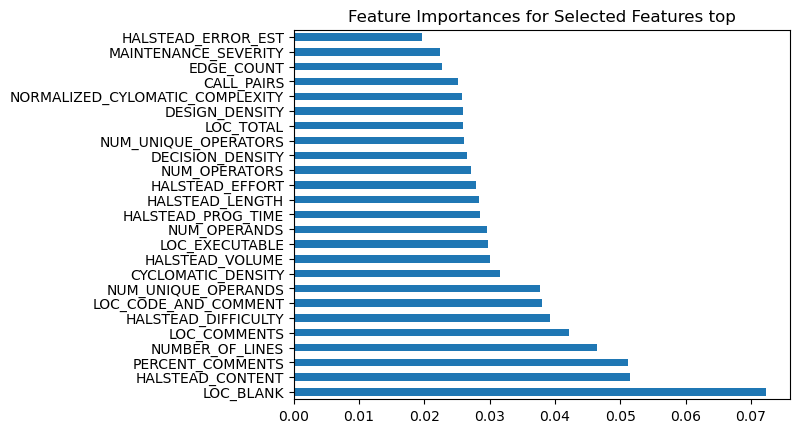

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.89
Precision: 0.79
Recall: 0.89
F1 score: 0.84
------------------------------
Top  25  selected features: {list(selected_features)}


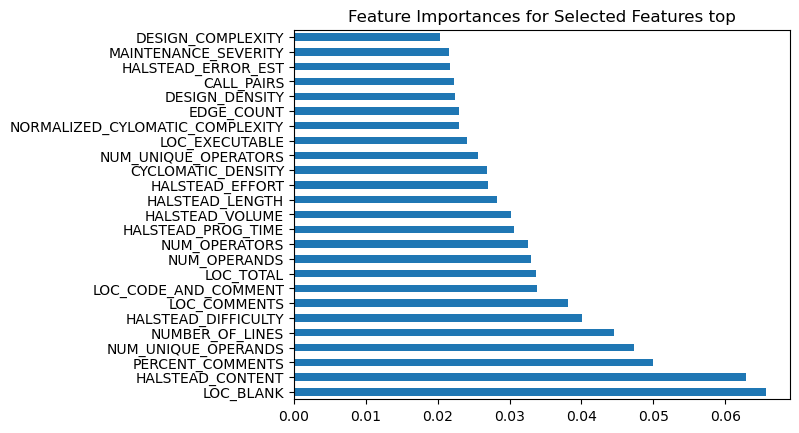

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Fold 5, RBF Kernel with gamma=0.1 and C=1:
Mean Accuracy: 0.88 ± 0.04
Mean Precision: 0.81 ± 0.07
Mean Recall: 0.88 ± 0.04
Mean F1 Score: 0.83 ± 0.05
Top  25  selected features: {list(selected_features)}


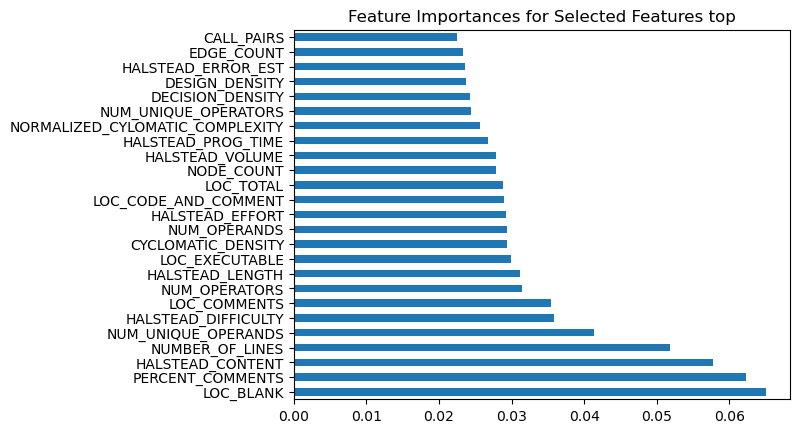

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.86
Precision: 0.74
Recall: 0.86
F1 score: 0.79
------------------------------
Top  25  selected features: {list(selected_features)}


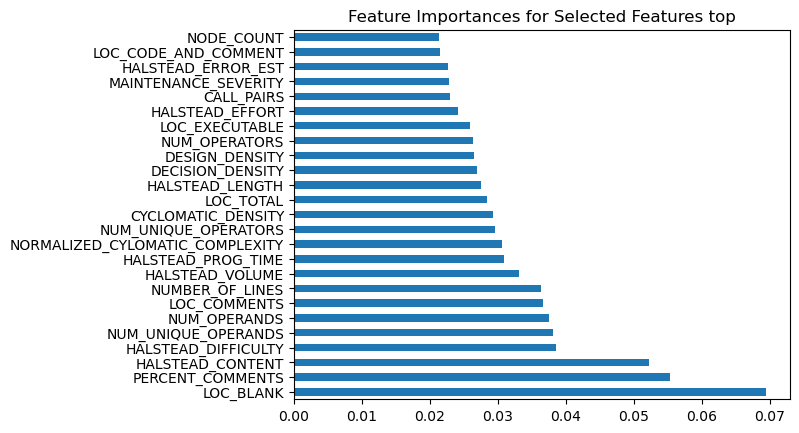

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Top  25  selected features: {list(selected_features)}


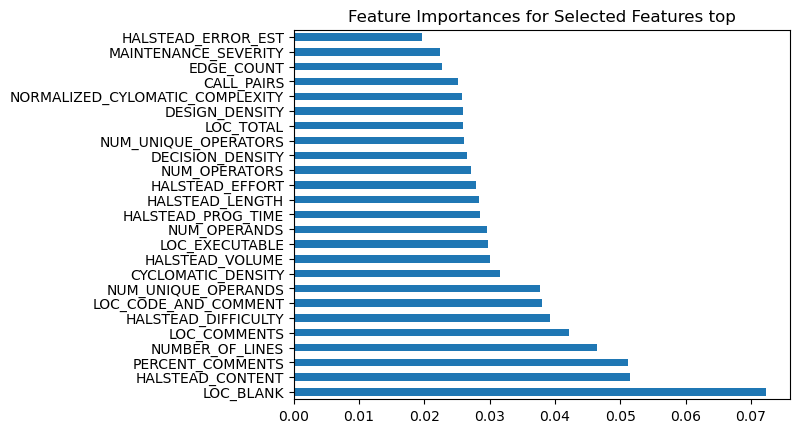

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.89
Precision: 0.79
Recall: 0.89
F1 score: 0.84
------------------------------
Top  25  selected features: {list(selected_features)}


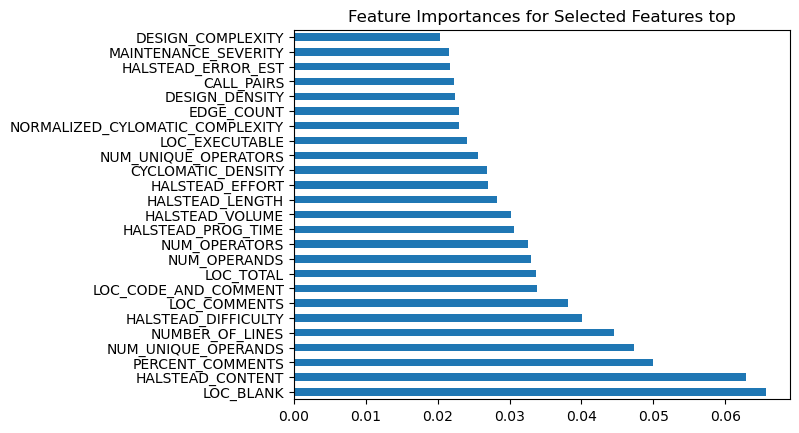

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Fold 5, RBF Kernel with gamma=1 and C=10:
Mean Accuracy: 0.88 ± 0.03
Mean Precision: 0.81 ± 0.07
Mean Recall: 0.88 ± 0.03
Mean F1 Score: 0.83 ± 0.05
Top  25  selected features: {list(selected_features)}


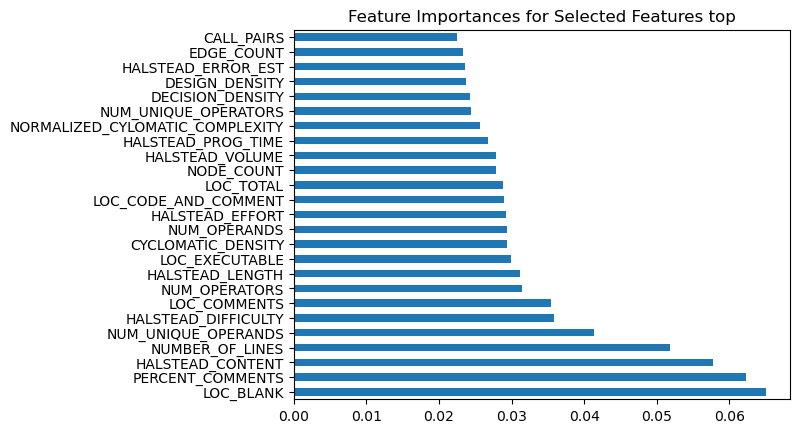

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.86
Precision: 0.74
Recall: 0.86
F1 score: 0.79
------------------------------
Top  25  selected features: {list(selected_features)}


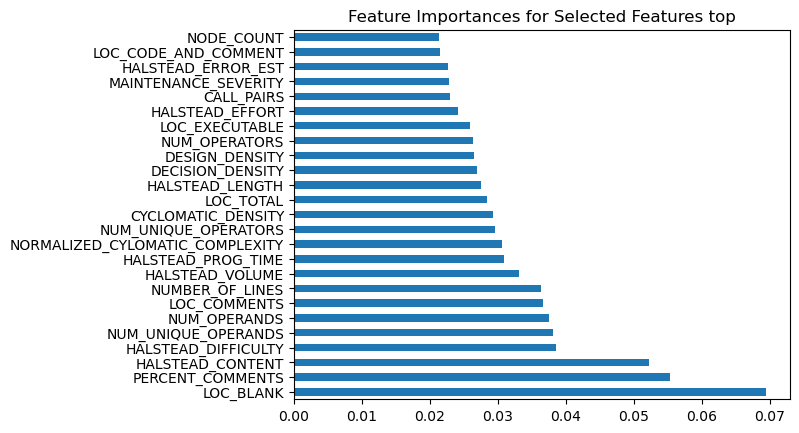

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Top  25  selected features: {list(selected_features)}


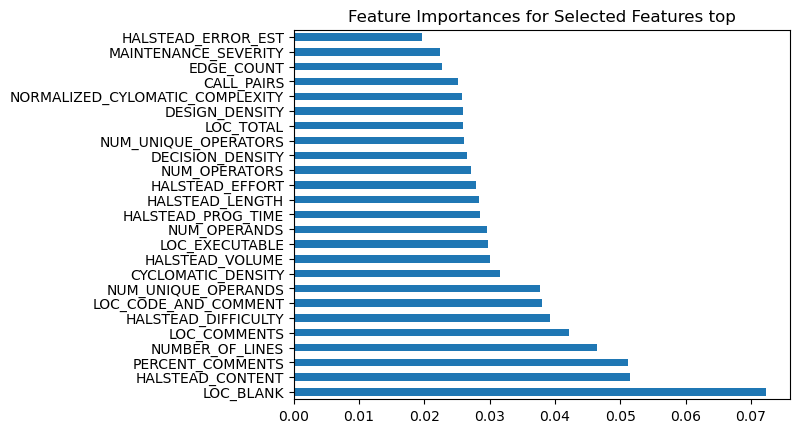

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.89
Precision: 0.79
Recall: 0.89
F1 score: 0.84
------------------------------
Top  25  selected features: {list(selected_features)}


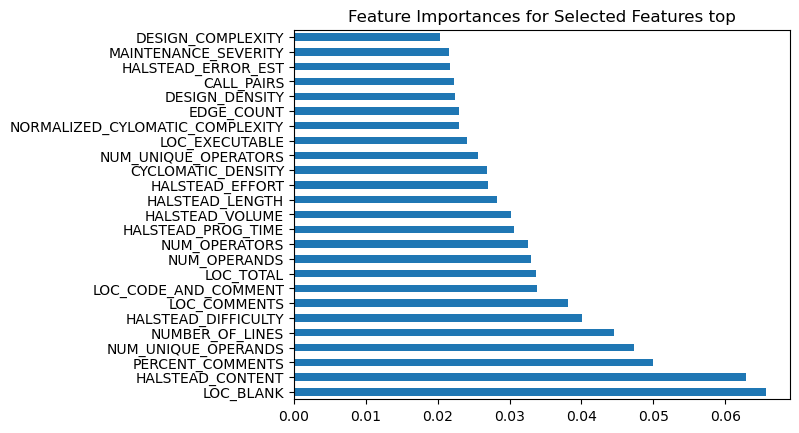

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Fold 5, RBF Kernel with gamma=10 and C=100:
Mean Accuracy: 0.88 ± 0.03
Mean Precision: 0.81 ± 0.07
Mean Recall: 0.88 ± 0.03
Mean F1 Score: 0.83 ± 0.05
Top  25  selected features: {list(selected_features)}


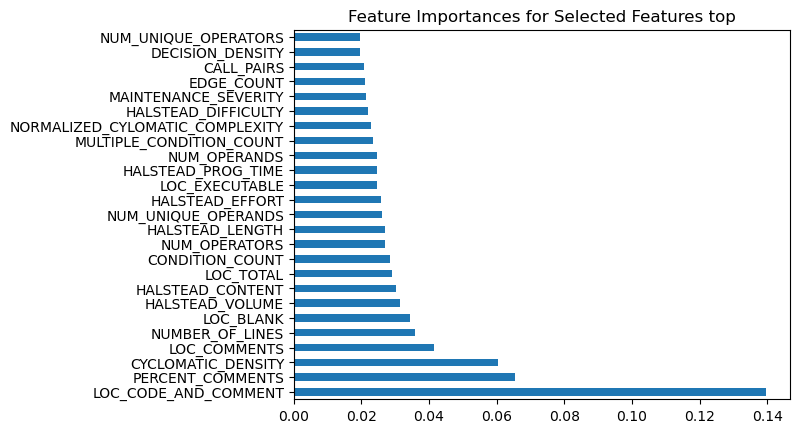

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.87
Precision: 0.75
Recall: 0.87
F1 score: 0.81
------------------------------
Top  25  selected features: {list(selected_features)}


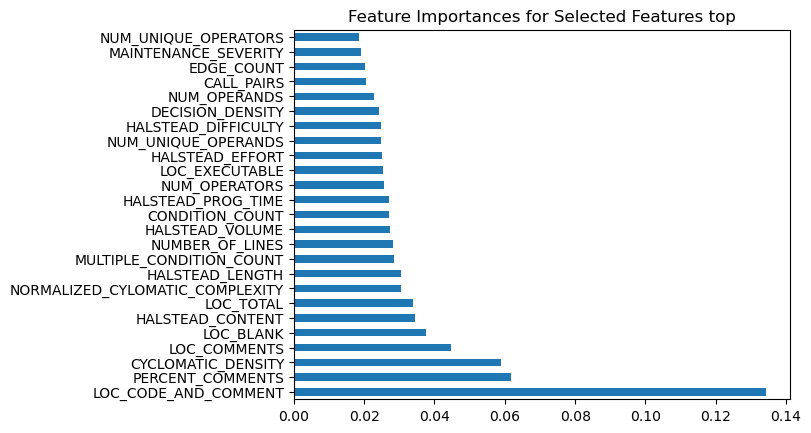

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.89
Precision: 0.79
Recall: 0.89
F1 score: 0.83
------------------------------
Top  25  selected features: {list(selected_features)}


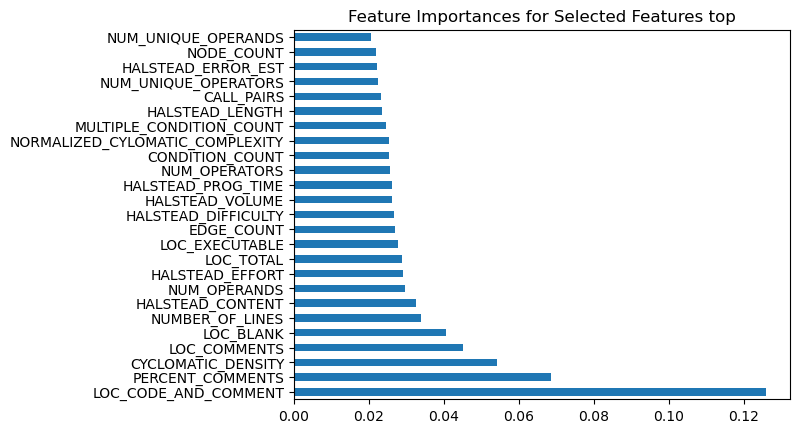

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.86
Precision: 0.74
Recall: 0.86
F1 score: 0.80
------------------------------
Top  25  selected features: {list(selected_features)}


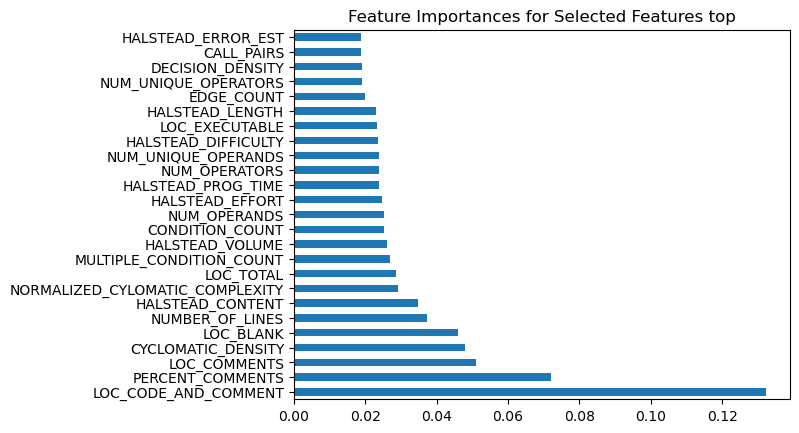

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 score: 0.84
------------------------------
Fold 5, RBF Kernel with gamma=0.01 and C=0.1:
Mean Accuracy: 0.88 ± 0.03
Mean Precision: 0.80 ± 0.07
Mean Recall: 0.88 ± 0.03
Mean F1 Score: 0.83 ± 0.05
Top  25  selected features: {list(selected_features)}


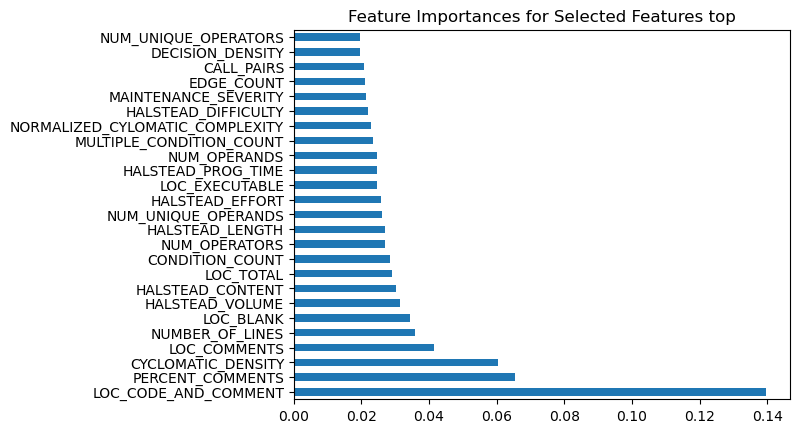

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.87
Precision: 0.75
Recall: 0.87
F1 score: 0.81
------------------------------
Top  25  selected features: {list(selected_features)}


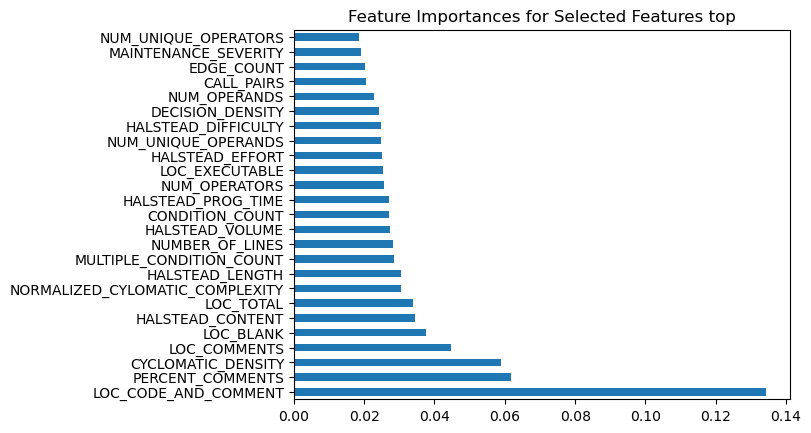

Accuracy: 0.88
Precision: 0.79
Recall: 0.88
F1 score: 0.83
------------------------------
Top  25  selected features: {list(selected_features)}


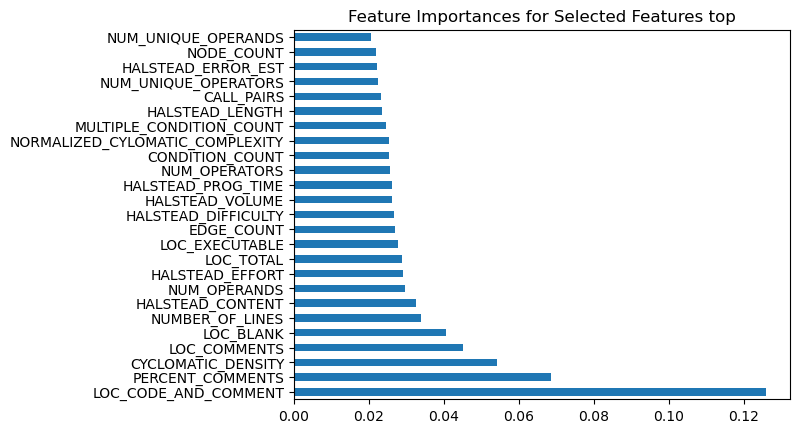

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.86
Precision: 0.74
Recall: 0.86
F1 score: 0.80
------------------------------
Top  25  selected features: {list(selected_features)}


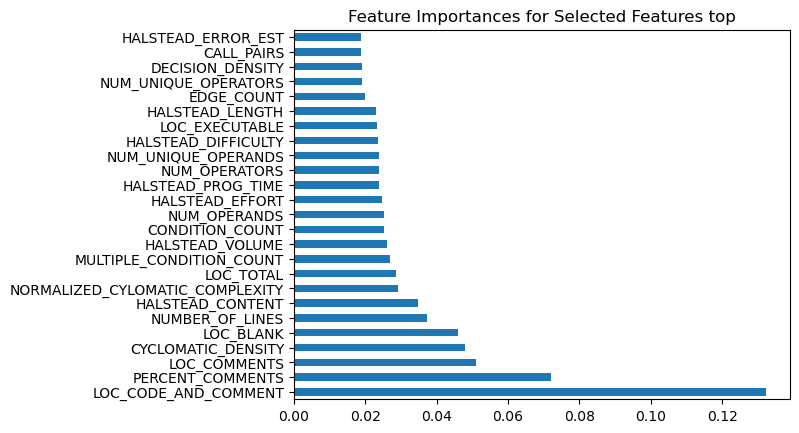

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 score: 0.84
------------------------------
Fold 5, RBF Kernel with gamma=0.1 and C=1:
Mean Accuracy: 0.88 ± 0.03
Mean Precision: 0.80 ± 0.06
Mean Recall: 0.88 ± 0.03
Mean F1 Score: 0.83 ± 0.05
Top  25  selected features: {list(selected_features)}


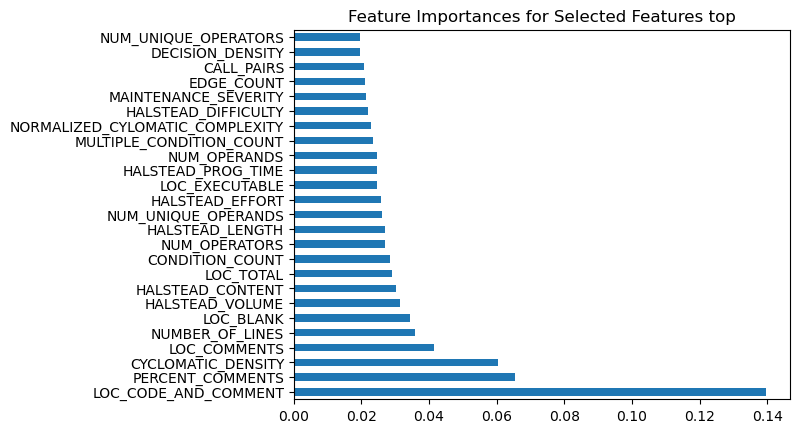

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.87
Precision: 0.75
Recall: 0.87
F1 score: 0.81
------------------------------
Top  25  selected features: {list(selected_features)}


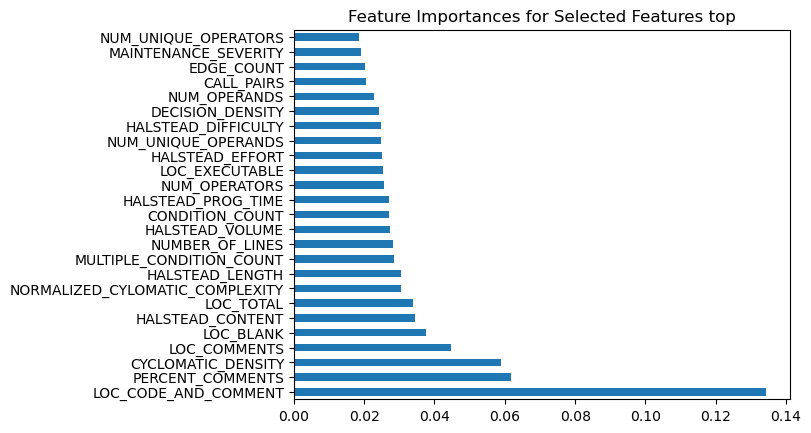

Accuracy: 0.88
Precision: 0.79
Recall: 0.88
F1 score: 0.83
------------------------------
Top  25  selected features: {list(selected_features)}


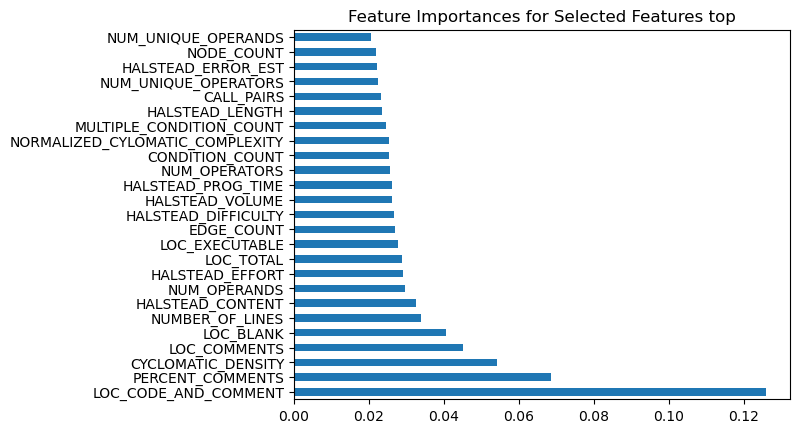

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.86
Precision: 0.74
Recall: 0.86
F1 score: 0.80
------------------------------
Top  25  selected features: {list(selected_features)}


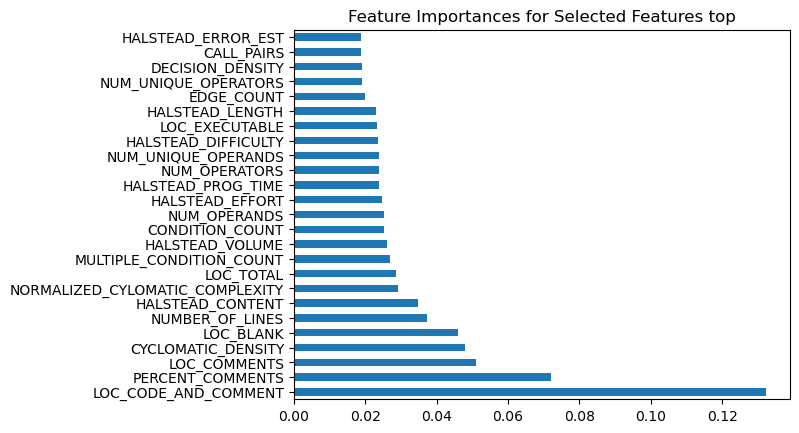

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 score: 0.84
------------------------------
Fold 5, RBF Kernel with gamma=1 and C=10:
Mean Accuracy: 0.88 ± 0.03
Mean Precision: 0.80 ± 0.06
Mean Recall: 0.88 ± 0.03
Mean F1 Score: 0.83 ± 0.05
Top  25  selected features: {list(selected_features)}


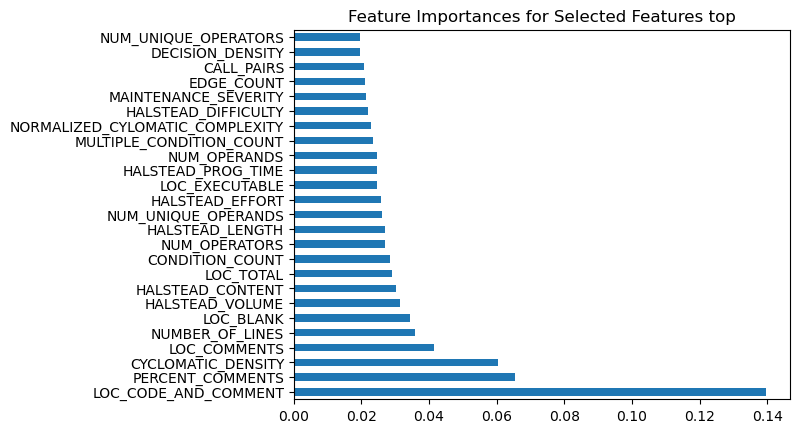

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.87
Precision: 0.75
Recall: 0.87
F1 score: 0.81
------------------------------
Top  25  selected features: {list(selected_features)}


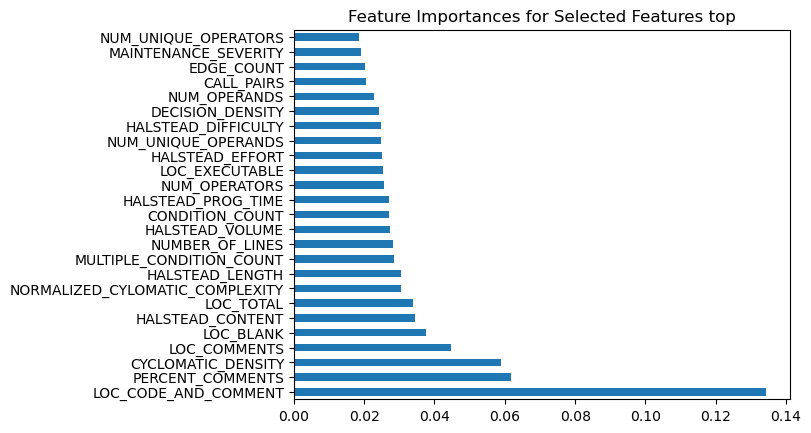

Accuracy: 0.88
Precision: 0.79
Recall: 0.88
F1 score: 0.83
------------------------------
Top  25  selected features: {list(selected_features)}


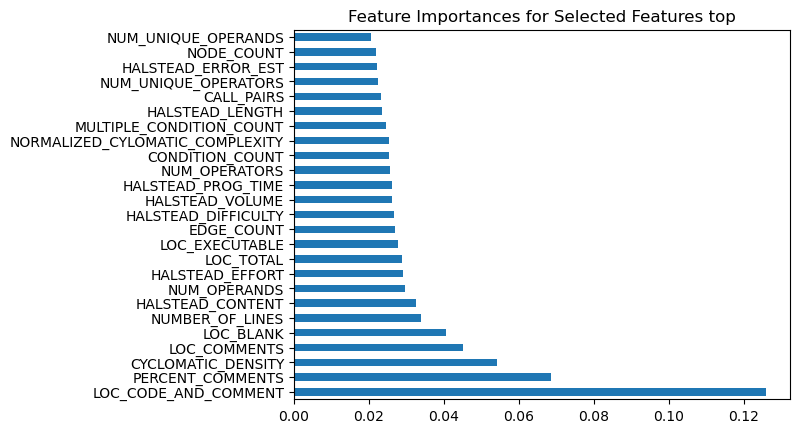

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.86
Precision: 0.74
Recall: 0.86
F1 score: 0.80
------------------------------
Top  25  selected features: {list(selected_features)}


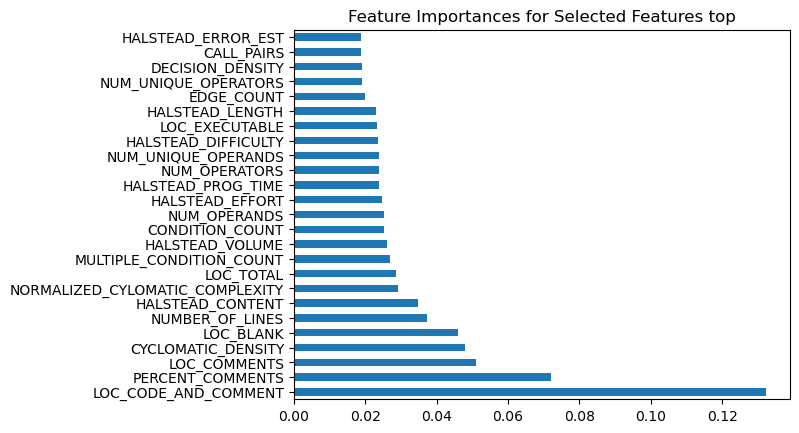

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 score: 0.84
------------------------------
Fold 5, RBF Kernel with gamma=10 and C=100:
Mean Accuracy: 0.88 ± 0.03
Mean Precision: 0.80 ± 0.06
Mean Recall: 0.88 ± 0.03
Mean F1 Score: 0.83 ± 0.05
Mean Accuracy: 0.88 ± 0.03
Mean Precision: 0.80 ± 0.06
Mean Recall: 0.88 ± 0.03
Mean F1 Score: 0.83 ± 0.05


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Initialize KFold with 20 splits
kf = KFold(n_splits=4, shuffle=True, random_state=5)


# Lists to store the metrics for each fold


# Define different gamma and C values for the RBF kernel (4 combinations)
gamma_values = [0.01, 0.1, 1, 10]  # You can adjust these gamma values
C_values = [0.1, 1, 10, 100]       # You can adjust these C values


# Loop through the different kernel variations (RBF with different gamma and C)

accuracies = []
precisions = []
recalls = []
f1_scores = []

for dataset in dataSets:
    
    # Assuming 'orig_df' is your dataset and it has features and a target column
    X = dataset.drop('defects', axis=1)  # Features (drop the target column)
    # print(dataset[X.columns].apply(pd.to_numeric, errors='coerce').isnull().sum())
    y = dataset['defects']

    # To store results of each fold (optional)
    for gamma, C in zip(gamma_values, C_values):
        fold_num = 1

        for train_index, test_index in kf.split(X):
            # Split data into train and test for this fold
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
            # Initialize ExtraTreesClassifier for feature selection
            model = RandomForestClassifier(random_state=42)
            model.fit(X_train, y_train)

            num_features_to_select = int(0.7 * X_train.shape[1])
            feature_importances = model.feature_importances_
            indices = np.argsort(feature_importances)[::-1]  # Get indices of the sorted feature importances in descending order
            selected_features = X_train.columns[indices[:num_features_to_select] ]  # Select the corresponding feature names
                    # Calculate number of features to select as 60% of total features

            print(f"Top ",num_features_to_select," selected features: {list(selected_features)}")

            # Transform the train and test sets to only include the selected features
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            # Plot graph of feature importances only for selected features
            selected_feat_importances = pd.Series(feature_importances, index=X_train.columns)[selected_features]
            selected_feat_importances.sort_values(ascending=False).plot(kind='barh')
            plt.title("Feature Importances for Selected Features top")
            plt.show()

            # Initialize the SVM model
            clf = SVC(kernel='rbf', C=C, gamma=gamma)

            # Train the SVM model on the selected features
            clf.fit(X_train_selected, y_train)
    
            # Predict on the test data with selected features
            y_pred = clf.predict(X_test_selected)
    
            # Split data into train and test for this fold
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
            # Calculate metrics
            DT_accuracy = accuracy_score(y_test, y_pred)
            DT_precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for imbalanced classes
            DT_recall = recall_score(y_test, y_pred, average='weighted')
            DT_f1 = f1_score(y_test, y_pred, average='weighted')

            # Append metrics to lists
            accuracies.append(DT_accuracy)
            precisions.append(DT_precision)
            recalls.append(DT_recall)
            f1_scores.append(DT_f1)

            # Print metrics for this kernel variation
            print("Accuracy: {:.2f}".format(DT_accuracy))
            print("Precision: {:.2f}".format(DT_precision))
            print("Recall: {:.2f}".format(DT_recall))
            print("F1 score: {:.2f}".format(DT_f1))
            print("-" * 30)
            fold_num += 1

        print(f"Fold {fold_num}, RBF Kernel with gamma={gamma} and C={C}:")
        # After all folds, calculate the mean and standard deviation of each metric
        mean_accuracy = np.mean(accuracies)
        mean_precision = np.mean(precisions)
        mean_recall = np.mean(recalls)
        mean_f1 = np.mean(f1_scores)

        std_accuracy = np.std(accuracies)
        std_precision = np.std(precisions)
        std_recall = np.std(recalls)
        std_f1 = np.std(f1_scores)

        # Print the compiled results
        print("Mean Accuracy: {:.2f} ± {:.2f}".format(mean_accuracy, std_accuracy))
        print("Mean Precision: {:.2f} ± {:.2f}".format(mean_precision, std_precision))
        print("Mean Recall: {:.2f} ± {:.2f}".format(mean_recall, std_recall))
        print("Mean F1 Score: {:.2f} ± {:.2f}".format(mean_f1, std_f1))

# After all folds, calculate the mean and standard deviation of each metric
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

std_accuracy = np.std(accuracies)
std_precision = np.std(precisions)
std_recall = np.std(recalls)
std_f1 = np.std(f1_scores)

# Print the compiled results
print("Mean Accuracy: {:.2f} ± {:.2f}".format(mean_accuracy, std_accuracy))
print("Mean Precision: {:.2f} ± {:.2f}".format(mean_precision, std_precision))
print("Mean Recall: {:.2f} ± {:.2f}".format(mean_recall, std_recall))
print("Mean F1 Score: {:.2f} ± {:.2f}".format(mean_f1, std_f1))


In [6]:
import numpy as np
from sklearn.model_selection import KFold
from xgboost import XGBClassifier  # Import XGBoost classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Initialize KFold with 3 splits (as per your code)
kf = KFold(n_splits=3, shuffle=True, random_state=5)

# Fixed XGBoost hyperparameters
n_estimators = 50  # Number of trees in XGBoost
max_depth = 5      # Maximum depth of trees in XGBoost
learning_rate = 0.1  # Fixed learning rate (ETA)

# Initialize best tracking variables
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0
best_thresholds = {}  # To store the best thresholds for each metric

# Testing different feature selection thresholds from 0.1 to 1.0 in increments of 0.1
thresholds = np.arange(0.1, 1.1, 0.1)

for threshold in thresholds:
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for dataset in dataSets:
        # Assuming 'dataset' is your dataset and it has features and a target column
        X = dataset.drop('defects', axis=1)  # Features (drop the target column)
        y = dataset['defects']  # Target column

        for train_index, test_index in kf.split(X):
            # Split data into train and test for this fold
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Feature selection with RandomForest
            model = RandomForestClassifier(random_state=42)
            model.fit(X_train, y_train)

            num_features_to_select = int(threshold * X_train.shape[1])  # Select based on current threshold
            feature_importances = model.feature_importances_
            indices = np.argsort(feature_importances)[::-1]  # Sort feature importances in descending order
            selected_features = X_train.columns[indices[:num_features_to_select]]  # Select top features

            # Transform the train and test sets to only include the selected features
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            # Initialize the XGBoost model with the fixed hyperparameters
            clf = XGBClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                learning_rate=learning_rate,  # Fixed learning rate
                                random_state=42,
                                use_label_encoder=False,
                                eval_metric='logloss')

            le = LabelEncoder()
            y_train = le.fit_transform(y_train)

            # Train the XGBoost model on the selected features
            clf.fit(X_train_selected, y_train)

            # Predict on the test data with selected features
            y_pred = clf.predict(X_test_selected)

            # Calculate metrics
            DT_accuracy = accuracy_score(y_test, y_pred)
            DT_precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for imbalanced classes
            DT_recall = recall_score(y_test, y_pred, average='weighted')
            DT_f1 = f1_score(y_test, y_pred, average='weighted')

            # Append metrics to lists
            accuracies.append(DT_accuracy)
            precisions.append(DT_precision)
            recalls.append(DT_recall)
            f1_scores.append(DT_f1)

    # After all folds, calculate the mean of each metric
    mean_accuracy = np.mean(accuracies)
    mean_precision = np.mean(precisions)
    mean_recall = np.mean(recalls)
    mean_f1 = np.mean(f1_scores)

    # Track the best metrics and update parameters if the current combination is better
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_thresholds['accuracy'] = threshold

    if mean_precision > best_precision:
        best_precision = mean_precision
        best_thresholds['precision'] = threshold

    if mean_recall > best_recall:
        best_recall = mean_recall
        best_thresholds['recall'] = threshold

    if mean_f1 > best_f1:
        best_f1 = mean_f1
        best_thresholds['f1'] = threshold

# After all combinations, print the best results and their corresponding thresholds
print("\nBest Results:")
print("Highest Accuracy: {:.2f} with feature selection threshold={:.1f}".format(
    best_accuracy, best_thresholds['accuracy']))
print("Highest Precision: {:.2f} with feature selection threshold={:.1f}".format(
    best_precision, best_thresholds['precision']))
print("Highest Recall: {:.2f} with feature selection threshold={:.1f}".format(
    best_recall, best_thresholds['recall']))
print("Highest F1 Score: {:.2f} with feature selection threshold={:.1f}".format(
    best_f1, best_thresholds['f1']))


/home/akurdi/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [03:29:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akurdi/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [03:29:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akurdi/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [03:29:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akurdi/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [03:29:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akurdi/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [03:29:24] WARNING


Best Results:
Highest Accuracy: 0.88 with feature selection threshold=0.8
Highest Precision: 0.86 with feature selection threshold=0.8
Highest Recall: 0.88 with feature selection threshold=0.8
Highest F1 Score: 0.86 with feature selection threshold=0.8


/home/akurdi/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [03:30:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [7]:
import numpy as np
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder

# Initialize KFold with 3 splits
kf = KFold(n_splits=3, shuffle=True, random_state=5)

# Fixed XGBoost and SVM hyperparameters
xgb_params = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.1,
    'random_state': 42,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
}
svm_params = {
    'kernel': 'rbf',
    'C': 1,
    'gamma': 0.1
}

# Initialize best tracking variables
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0
best_thresholds = {}

# Testing different feature selection thresholds from 0.1 to 1.0 in increments of 0.1
thresholds = np.arange(0.1, 1.1, 0.1)

for threshold in thresholds:
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for dataset in dataSets:
        X = dataset.drop('defects', axis=1)  # Features (drop the target column)
        y = dataset['defects']  # Target column

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Feature selection with RandomForest
            model = RandomForestClassifier(random_state=42)
            model.fit(X_train, y_train)

            num_features_to_select = int(threshold * X_train.shape[1])
            feature_importances = model.feature_importances_
            indices = np.argsort(feature_importances)[::-1]
            selected_features = X_train.columns[indices[:num_features_to_select]]

            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            # Initialize the models with fixed hyperparameters
            clf_xgb = XGBClassifier(**xgb_params)
            clf_svm = SVC(**svm_params, probability=True)

            # Combine models in VotingClassifier for majority vote
            voting_clf = VotingClassifier(estimators=[
                ('xgb', clf_xgb), 
                ('svm', clf_svm)
            ], voting='soft')  # 'soft' uses predicted probabilities

            le = LabelEncoder()
            y_train = le.fit_transform(y_train)

            # Train the VotingClassifier
            voting_clf.fit(X_train_selected, y_train)

            # Predict on the test data with selected features
            y_pred = voting_clf.predict(X_test_selected)

            # Calculate metrics
            DT_accuracy = accuracy_score(y_test, y_pred)
            DT_precision = precision_score(y_test, y_pred, average='weighted')
            DT_recall = recall_score(y_test, y_pred, average='weighted')
            DT_f1 = f1_score(y_test, y_pred, average='weighted')

            # Append metrics to lists
            accuracies.append(DT_accuracy)
            precisions.append(DT_precision)
            recalls.append(DT_recall)
            f1_scores.append(DT_f1)

    # After all folds, calculate the mean of each metric
    mean_accuracy = np.mean(accuracies)
    mean_precision = np.mean(precisions)
    mean_recall = np.mean(recalls)
    mean_f1 = np.mean(f1_scores)

    # Track the best metrics and update parameters if the current combination is better
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_thresholds['accuracy'] = threshold

    if mean_precision > best_precision:
        best_precision = mean_precision
        best_thresholds['precision'] = threshold

    if mean_recall > best_recall:
        best_recall = mean_recall
        best_thresholds['recall'] = threshold

    if mean_f1 > best_f1:
        best_f1 = mean_f1
        best_thresholds['f1'] = threshold

# After all combinations, print the best results and their corresponding thresholds
print("\nBest Results:")
print("Highest Accuracy: {:.2f} with feature selection threshold={:.1f}".format(
    best_accuracy, best_thresholds['accuracy']))
print("Highest Precision: {:.2f} with feature selection threshold={:.1f}".format(
    best_precision, best_thresholds['precision']))
print("Highest Recall: {:.2f} with feature selection threshold={:.1f}".format(
    best_recall, best_thresholds['recall']))
print("Highest F1 Score: {:.2f} with feature selection threshold={:.1f}".format(
    best_f1, best_thresholds['f1']))


/home/akurdi/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [03:37:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akurdi/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [03:37:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akurdi/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [03:37:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Results:
Highest Accuracy: 0.89 with feature selection threshold=0.3
Highest Precision: 0.84 with feature selection threshold=0.9
Highest Recall: 0.89 with feature selection threshold=0.3
Highest F1 Score: 0.84 with feature selection threshold=0.3
